## House Pricing Assignment (Advance Regression)
#### Author: Mahalakshmi Totad

#### Problem Statement :
Surprise Housing uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. So build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

##### Specifically, The company is looking at prospective properties to buy to enter the Australian market.

#### The company wants to know:
- Which variables are significant in predicting the price of a house, and
- How well those variables describe the price of a house.

Also, determine the optimal value of lambda for ridge and lasso regression.

#### Business Goal::
- To model the price of houses with the available independent variables. 
- The model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. 
- The model will be a good way for management to understand the pricing dynamics of a new market.

## Step 1: Reading and Understanding the Data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

### Data sourcing

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

import statsmodels.api as sm  

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import Ridge

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
housePricing = pd.read_csv("train.csv")

In [4]:
housePricing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
housePricing.shape

(1460, 81)

In [6]:
housePricing.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [7]:
housePricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
!pip install sweetviz

In [9]:
#Auto EDA
import sweetviz as sv
sweet_report = sv.analyze(housePricing,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

Feature: SalePrice                           |██████████| [100%]   00:09 -> (00:00 left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Data cleaning

#### Drop unused/redundant columns

In [10]:
housePricing=housePricing.drop(['Id'], axis = 1) 

#### Fixing Rows and Columns


In some of the variables valid NA which represents presence of data is being treated as Null value, hence rectifying that by replaceing NA with None

In [11]:
# List of those coulmns with NA valid values
cols = ["Alley", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]


In [12]:
#replaceing NA with None
for i in cols:
    housePricing[i].fillna("None", inplace=True)

#### Check for Missing/null values.

In [13]:
housePricing.isnull().sum().head(41)

MSSubClass        0
MSZoning          0
LotFrontage     259
LotArea           0
Street            0
Alley             0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
dtype: int64

In [14]:
housePricing.isnull().sum().tail(41)

HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageYrBlt      81
GarageFinish      0
GarageCars        0
GarageArea        0
GarageQual        0
GarageCond        0
PavedDrive        0
WoodDeckSF        0
OpenPorchSF       0
EnclosedPorch     0
3SsnPorch         0
ScreenPorch       0
PoolArea          0
PoolQC            0
Fence             0
MiscFeature       0
MiscVal           0
MoSold            0
YrSold            0
SaleType          0
SaleCondition     0
SalePrice         0
dtype: int64

In [15]:
housePricing.shape

(1460, 80)

#### There are few more columns with missing/null values let's analyze and Impute them

#### Imputation : Let's check if we can impute LotFrontage,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCond since there are 81  missing values

In [16]:
# For a numberic variable so let's check for outliers then try to impute with median and for categorical values with most occurance

In [17]:
housePricing.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64

<Axes: ylabel='LotFrontage'>

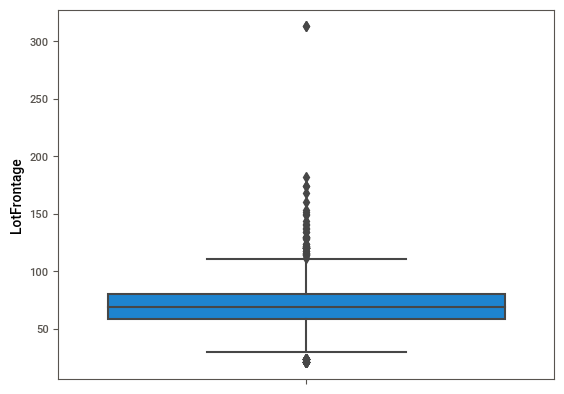

In [18]:
sns.boxplot(y='LotFrontage', data=housePricing)

In [19]:
#No outliers hence let's go and impute
housePricing['LotFrontage'].fillna(housePricing['LotFrontage'].median(),inplace=True)

In [20]:
housePricing.GarageYrBlt.value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1927.0     1
1900.0     1
1906.0     1
1908.0     1
1933.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

<Axes: ylabel='GarageYrBlt'>

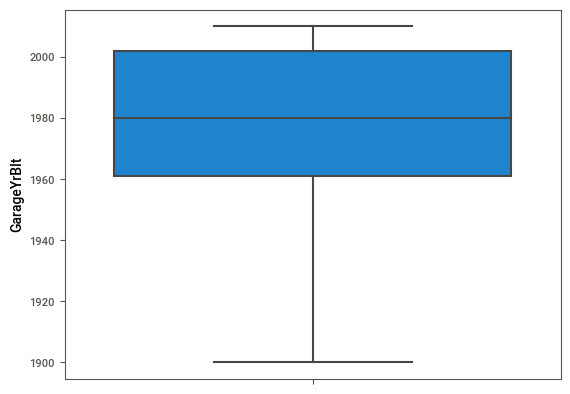

In [21]:
sns.boxplot(y='GarageYrBlt', data=housePricing)

In [22]:
#No outliers hence let's go and impute
housePricing['GarageYrBlt'].fillna(housePricing['GarageYrBlt'].mean(),inplace=True)

In [23]:
housePricing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

#### Electrical,MasVnrType, MasVnrArea have missing values. Analyzing and Imputing as follows

In [24]:
housePricing.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

<Axes: xlabel='count', ylabel='Electrical'>

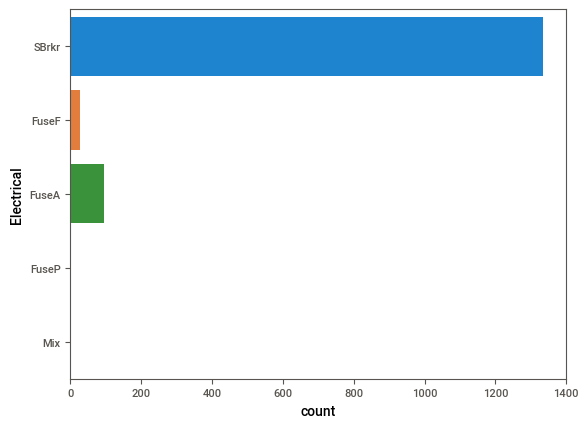

In [25]:
sns.countplot(y='Electrical', data=housePricing)

In [26]:
housePricing['Electrical'] = housePricing['Electrical'].replace(np.nan,'SBrkr')

In [27]:
housePricing.MasVnrType.value_counts() 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

<Axes: xlabel='count', ylabel='MasVnrType'>

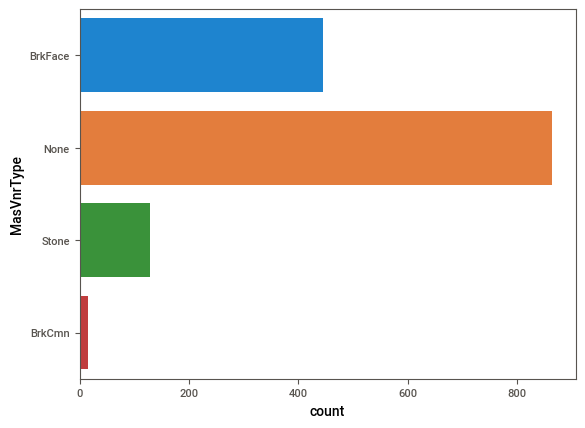

In [28]:
sns.countplot(y='MasVnrType', data=housePricing)

In [29]:
housePricing['MasVnrType'] = housePricing['MasVnrType'].replace(np.nan,'None')

In [30]:
housePricing.MasVnrArea.value_counts()

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64

<Axes: ylabel='MasVnrArea'>

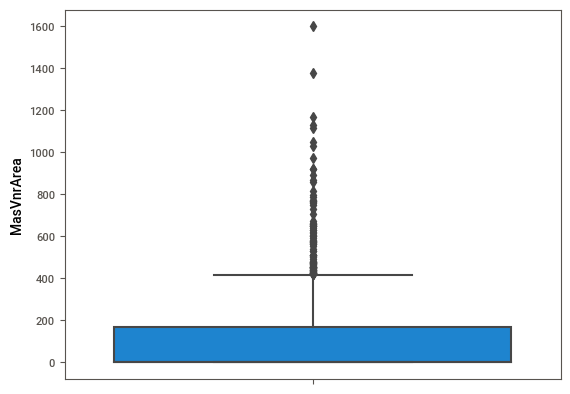

In [31]:
sns.boxplot(y='MasVnrArea', data=housePricing)

In [32]:
housePricing['MasVnrArea'].fillna(housePricing['MasVnrArea'].median(),inplace=True)

In [33]:
housePricing.isnull().sum().tail(40)

CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
PoolQC           0
Fence            0
MiscFeature      0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

In [34]:
housePricing.isnull().sum().head(40)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
dtype: int64

In [35]:
housePricing.shape

(1460, 80)

##  Step 2 : Visualising the Data

### Visualize for continuous numeric variables


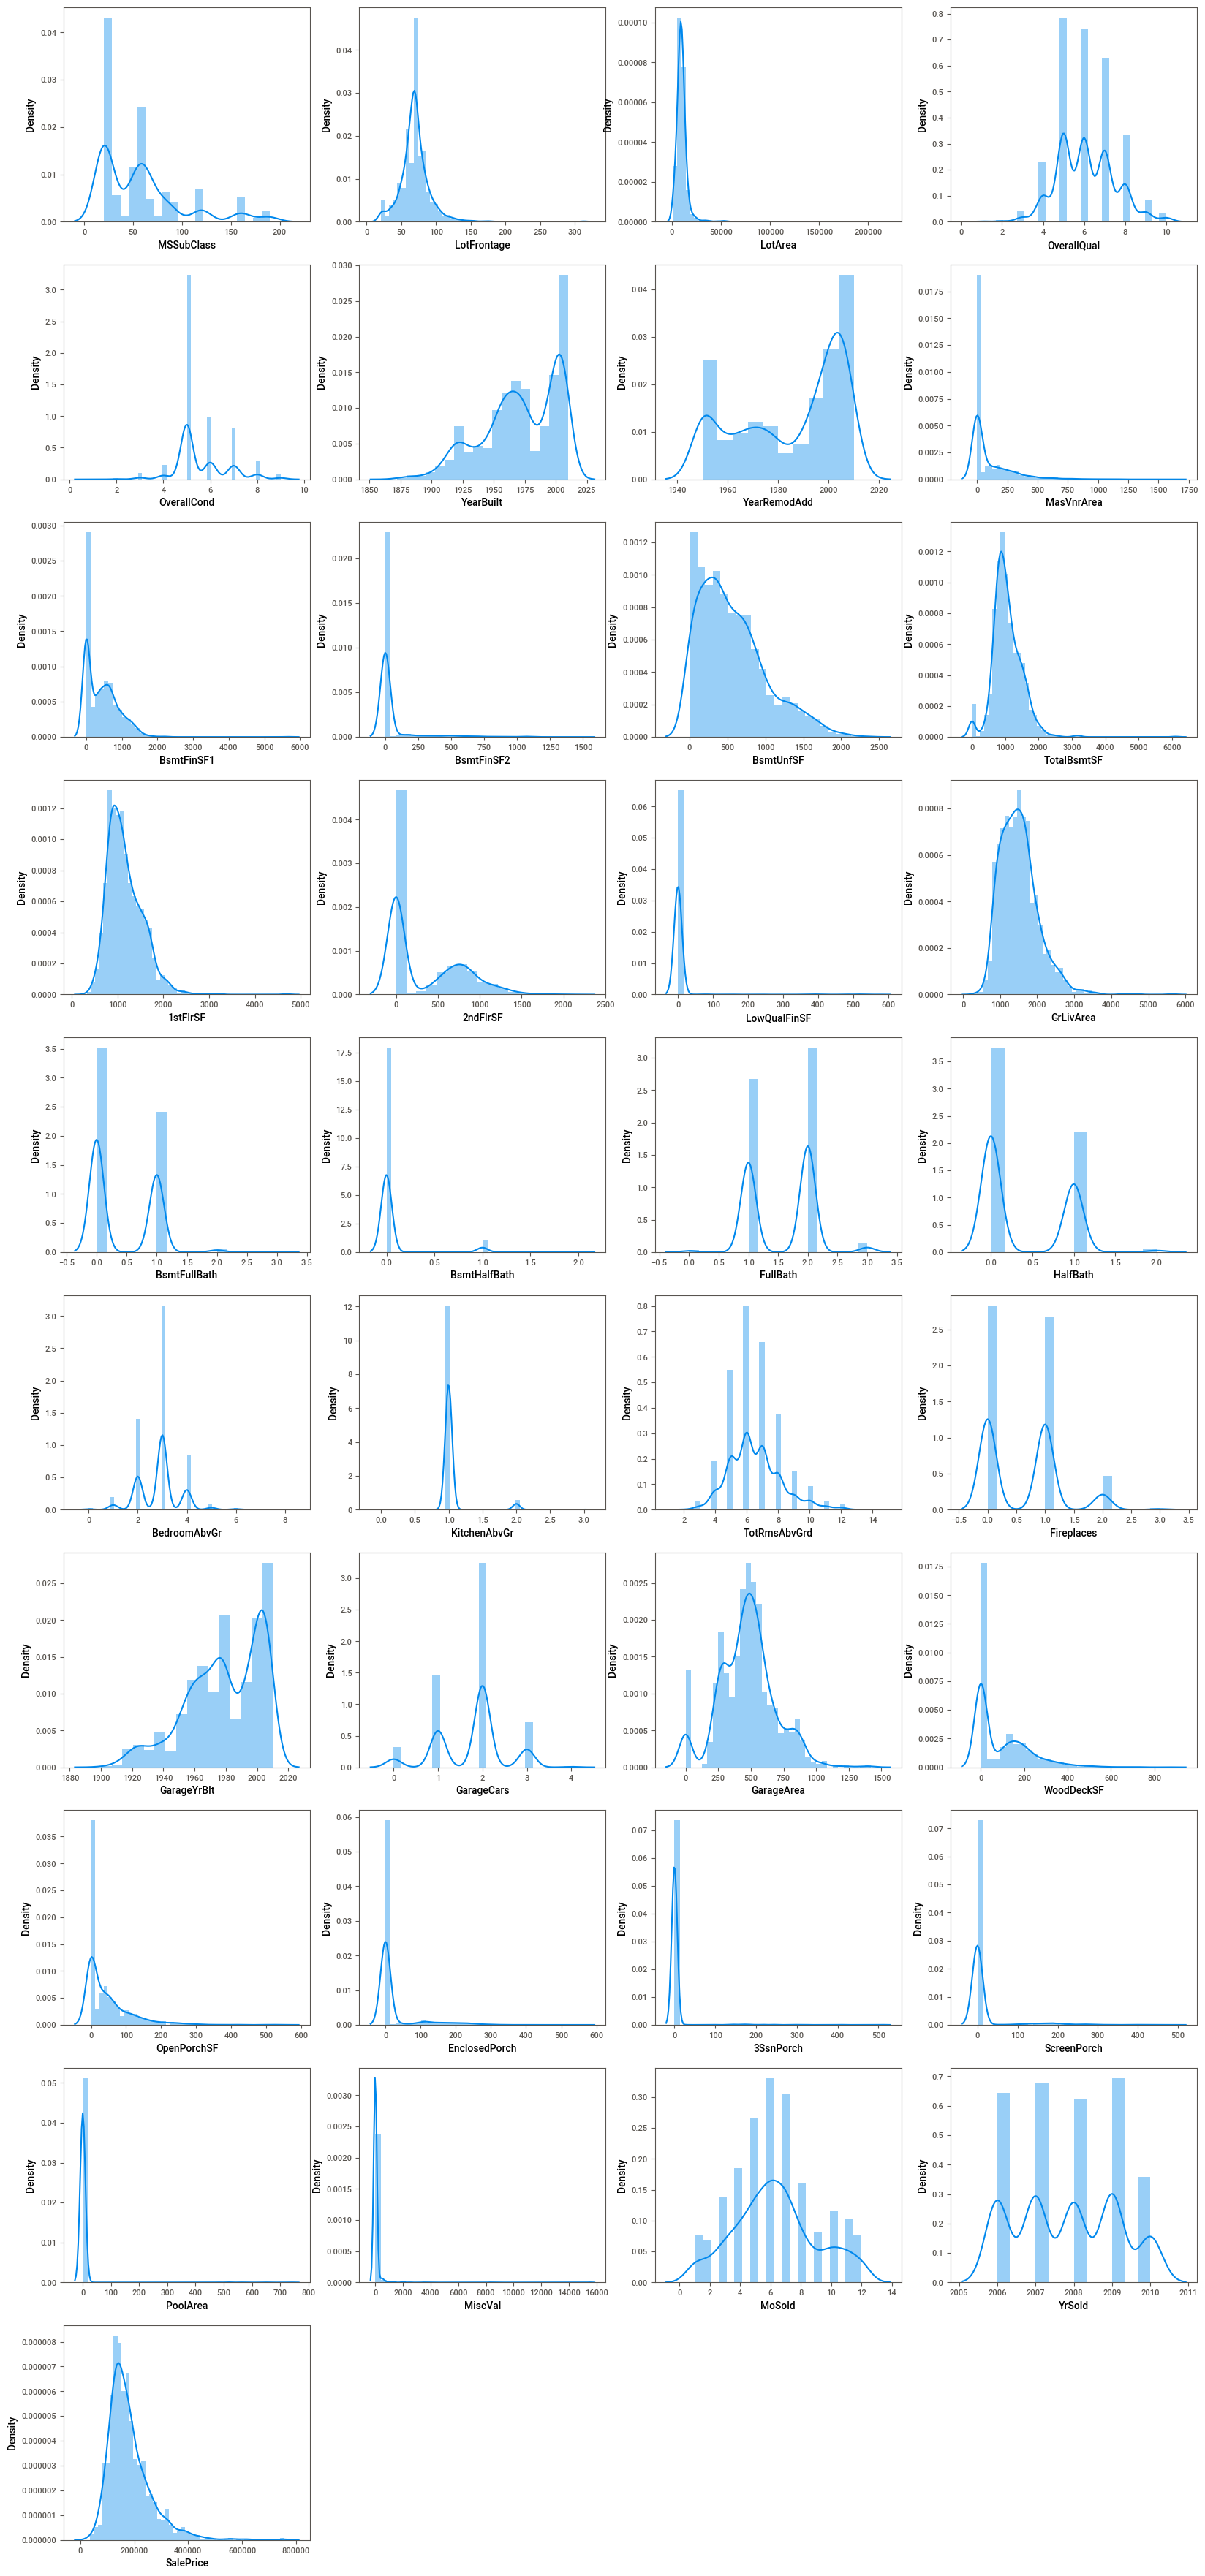

In [36]:
#List of all numeric variables
numericColumns = housePricing.dtypes[housePricing.dtypes != "object"].index

plt.figure(figsize=(20,45))

i = 1
for variables in numericColumns:
    plt.subplot(10,4,i)
    sns.distplot(housePricing[variables])
    i+=1
    
plt.show()

#### Inference: SalesPrice looks skewed along with some other variables as well

### Visualize for categorical variables


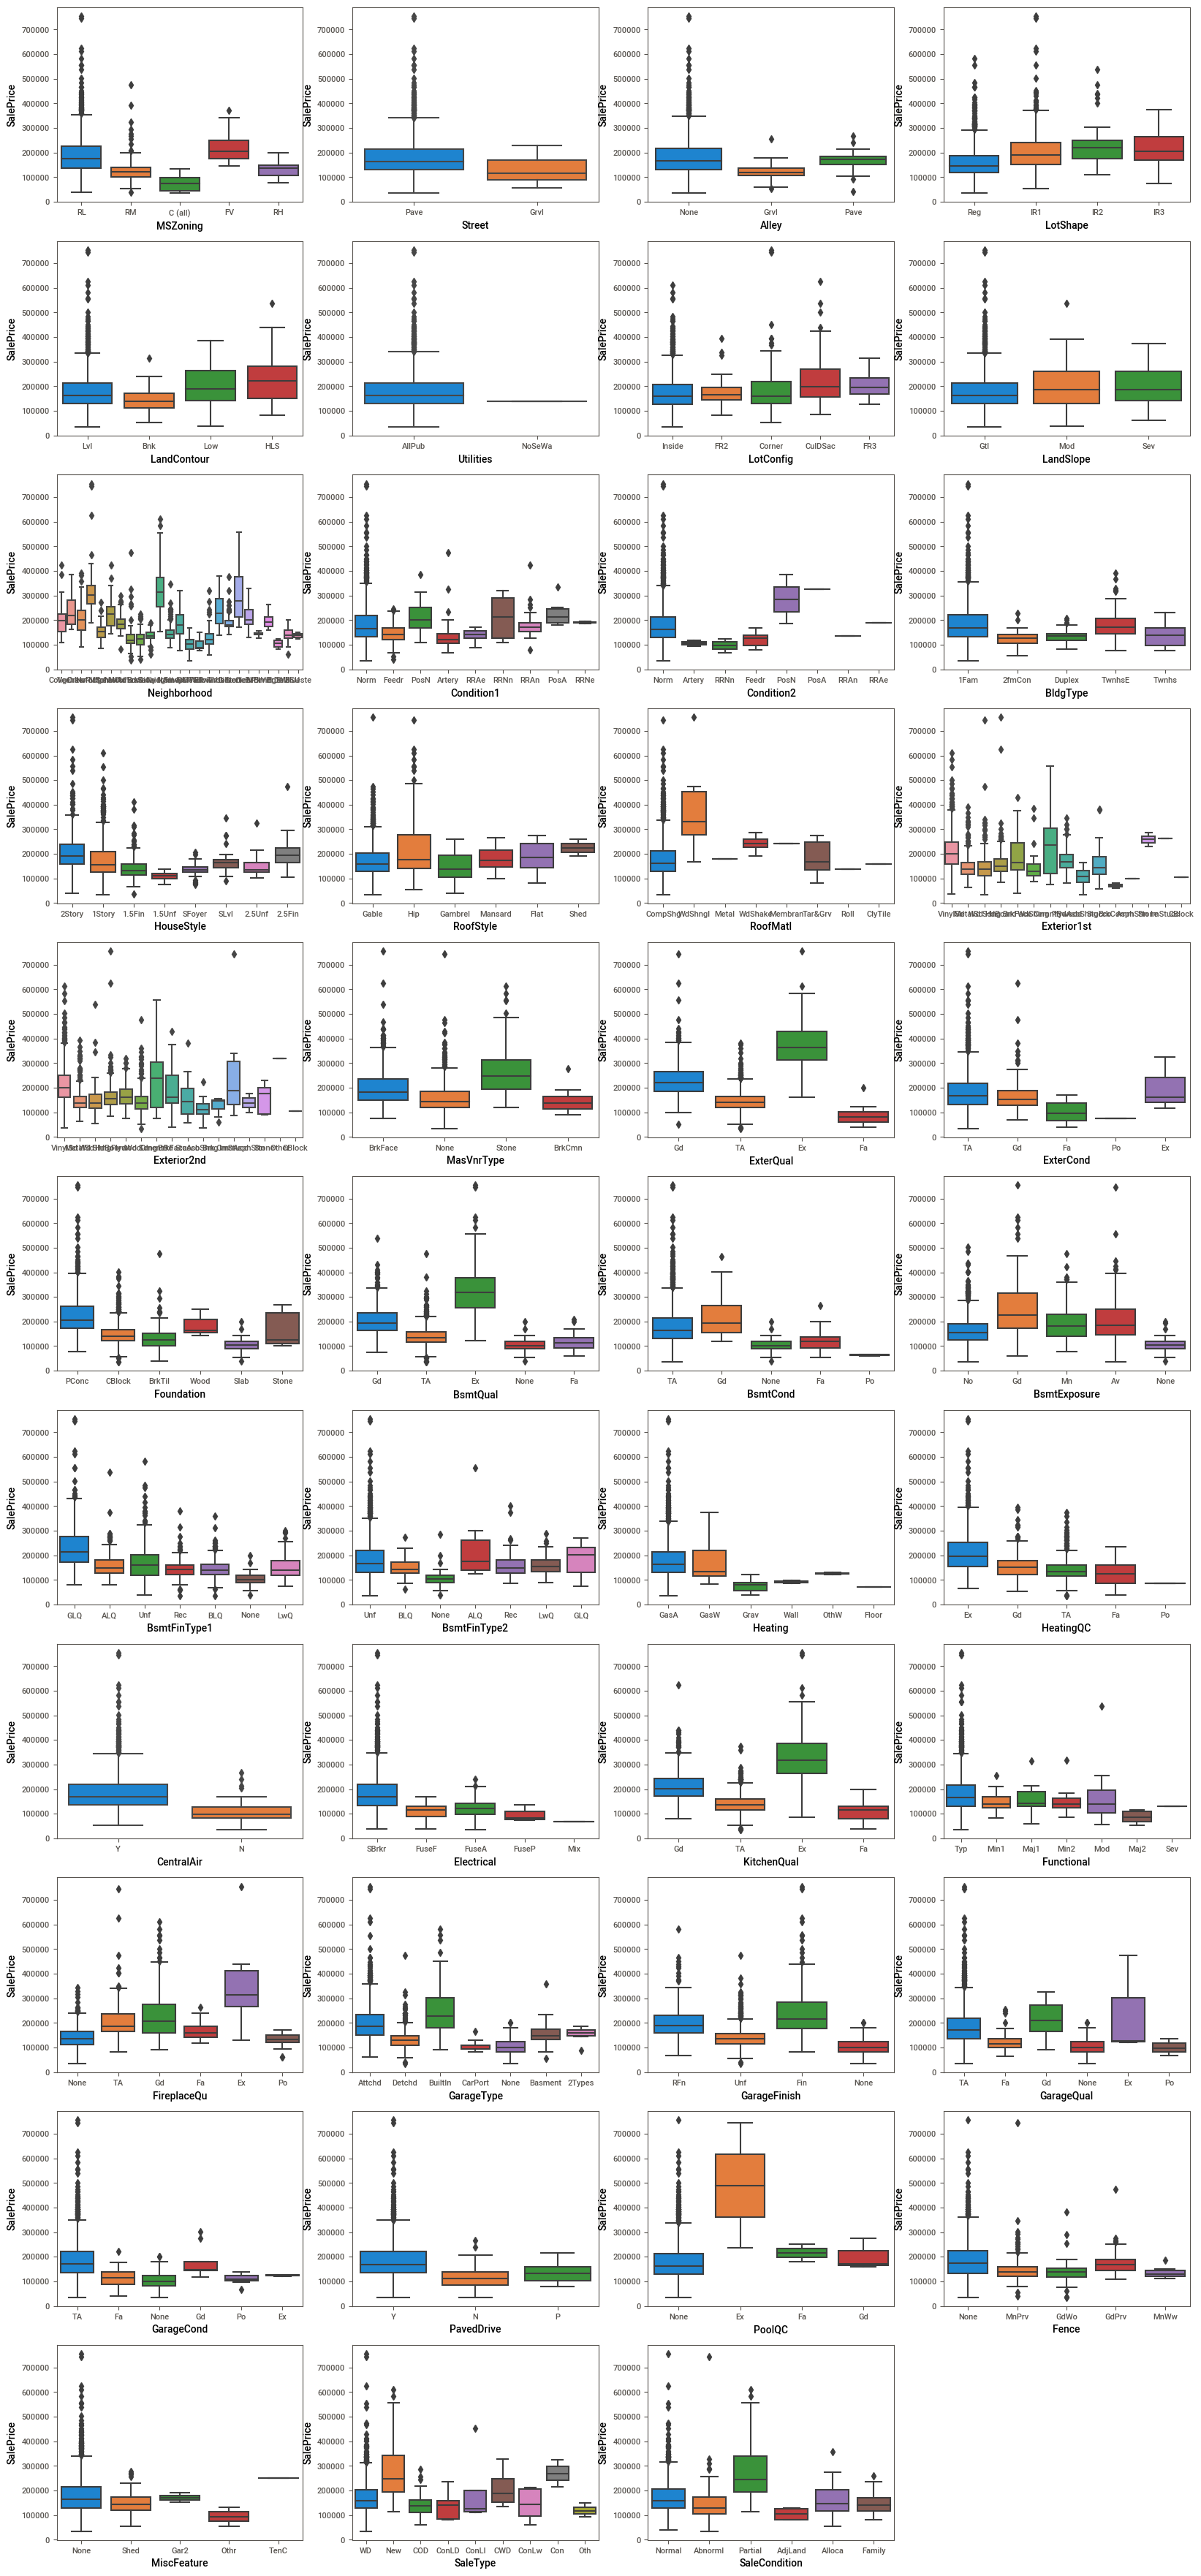

In [37]:
#List of all catrgorical variables
categoricalColumns = housePricing.dtypes[housePricing.dtypes == "object"].index

plt.figure(figsize=(20,45))

i = 1
for variables in categoricalColumns:
    plt.subplot(11,4,i)
    sns.boxplot(x= variables , y= 'SalePrice', data=housePricing)
    i+=1

#### Inference: There are lot of variables with outliers to be handled

### Standardizing
Removing outliers is an important step in data cleaning. 

In [38]:
# IQR to remove the outlier

cols = numericColumns
Q1 = housePricing[cols].quantile(0.05)
Q3 = housePricing[cols].quantile(0.95)
IQR = Q3 - Q1

housePricing = housePricing[~((housePricing[cols] < (Q1 - 1.5 * IQR)) |(housePricing[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [39]:
cols = categoricalColumns

Q1 = housePricing[cols].quantile(0.05)
Q3 = housePricing[cols].quantile(0.95)
IQR = Q3 - Q1

housePricing = housePricing[~((housePricing[cols] < (Q1 - 1.5 * IQR)) |(housePricing[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

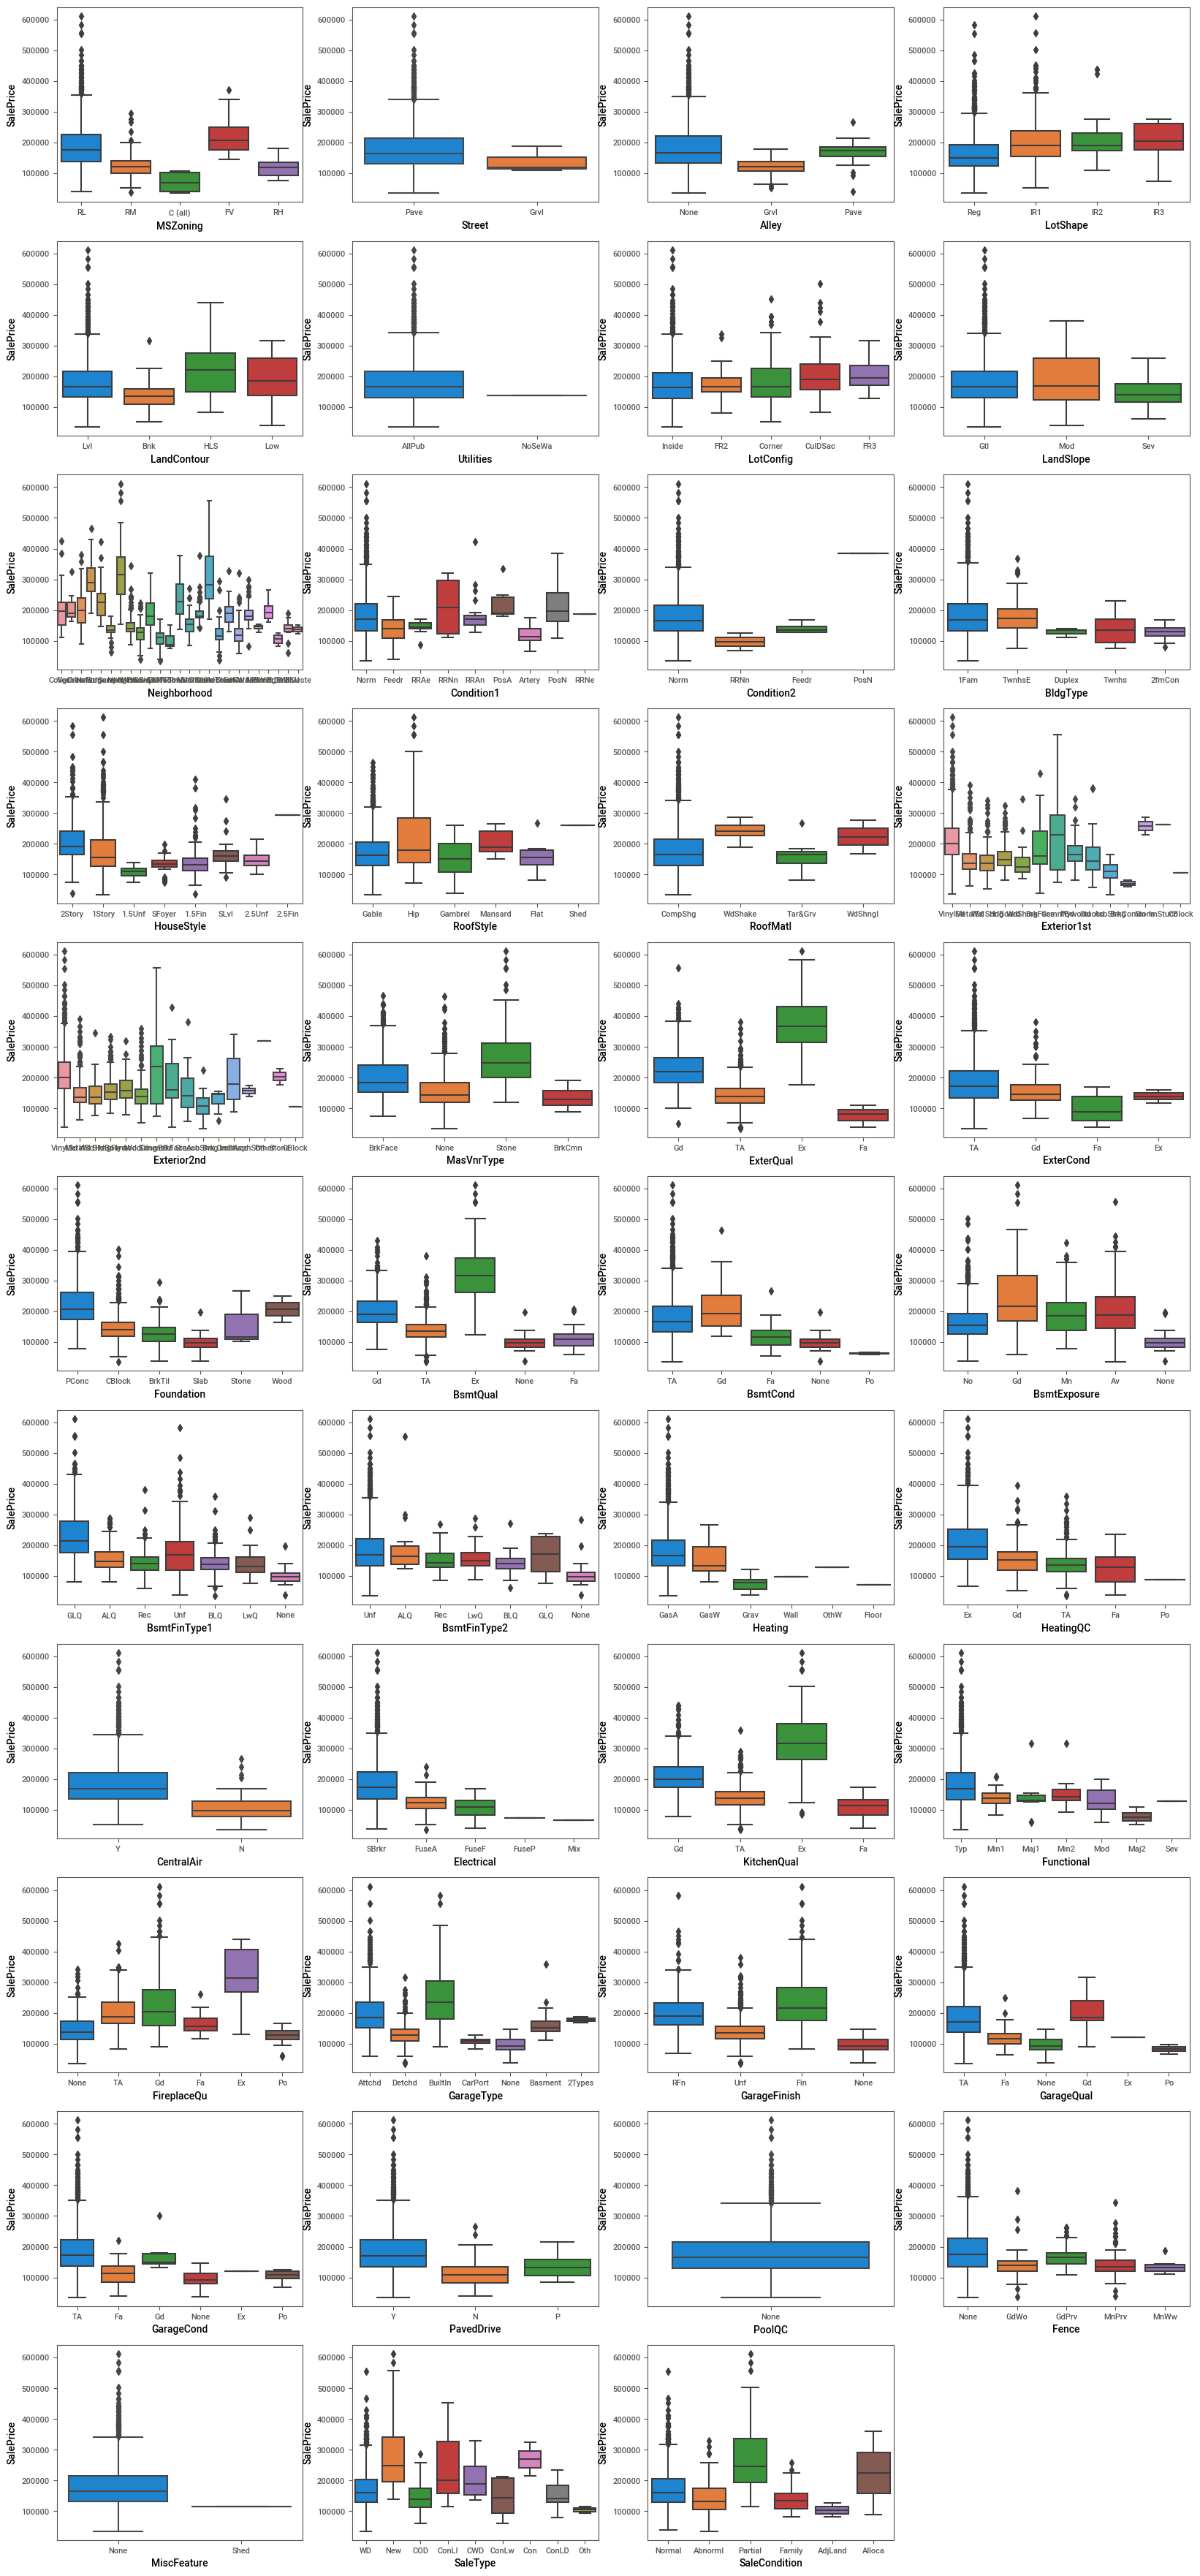

In [40]:
plt.figure(figsize=(20,45))

i = 1
for variables in categoricalColumns:
    plt.subplot(11,4,i)
    sns.boxplot(x= variables , y= 'SalePrice', data=housePricing)
    i+=1

In [41]:
#Auto EDA
sweet_report = sv.analyze(housePricing,pairwise_analysis="off")
sweet_report.show_html('sweet_report.html')

Feature: SalePrice                           |██████████| [100%]   00:09 -> (00:00 left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


### Exploratory Data Analysis

#### Visualize correlation using heatmap


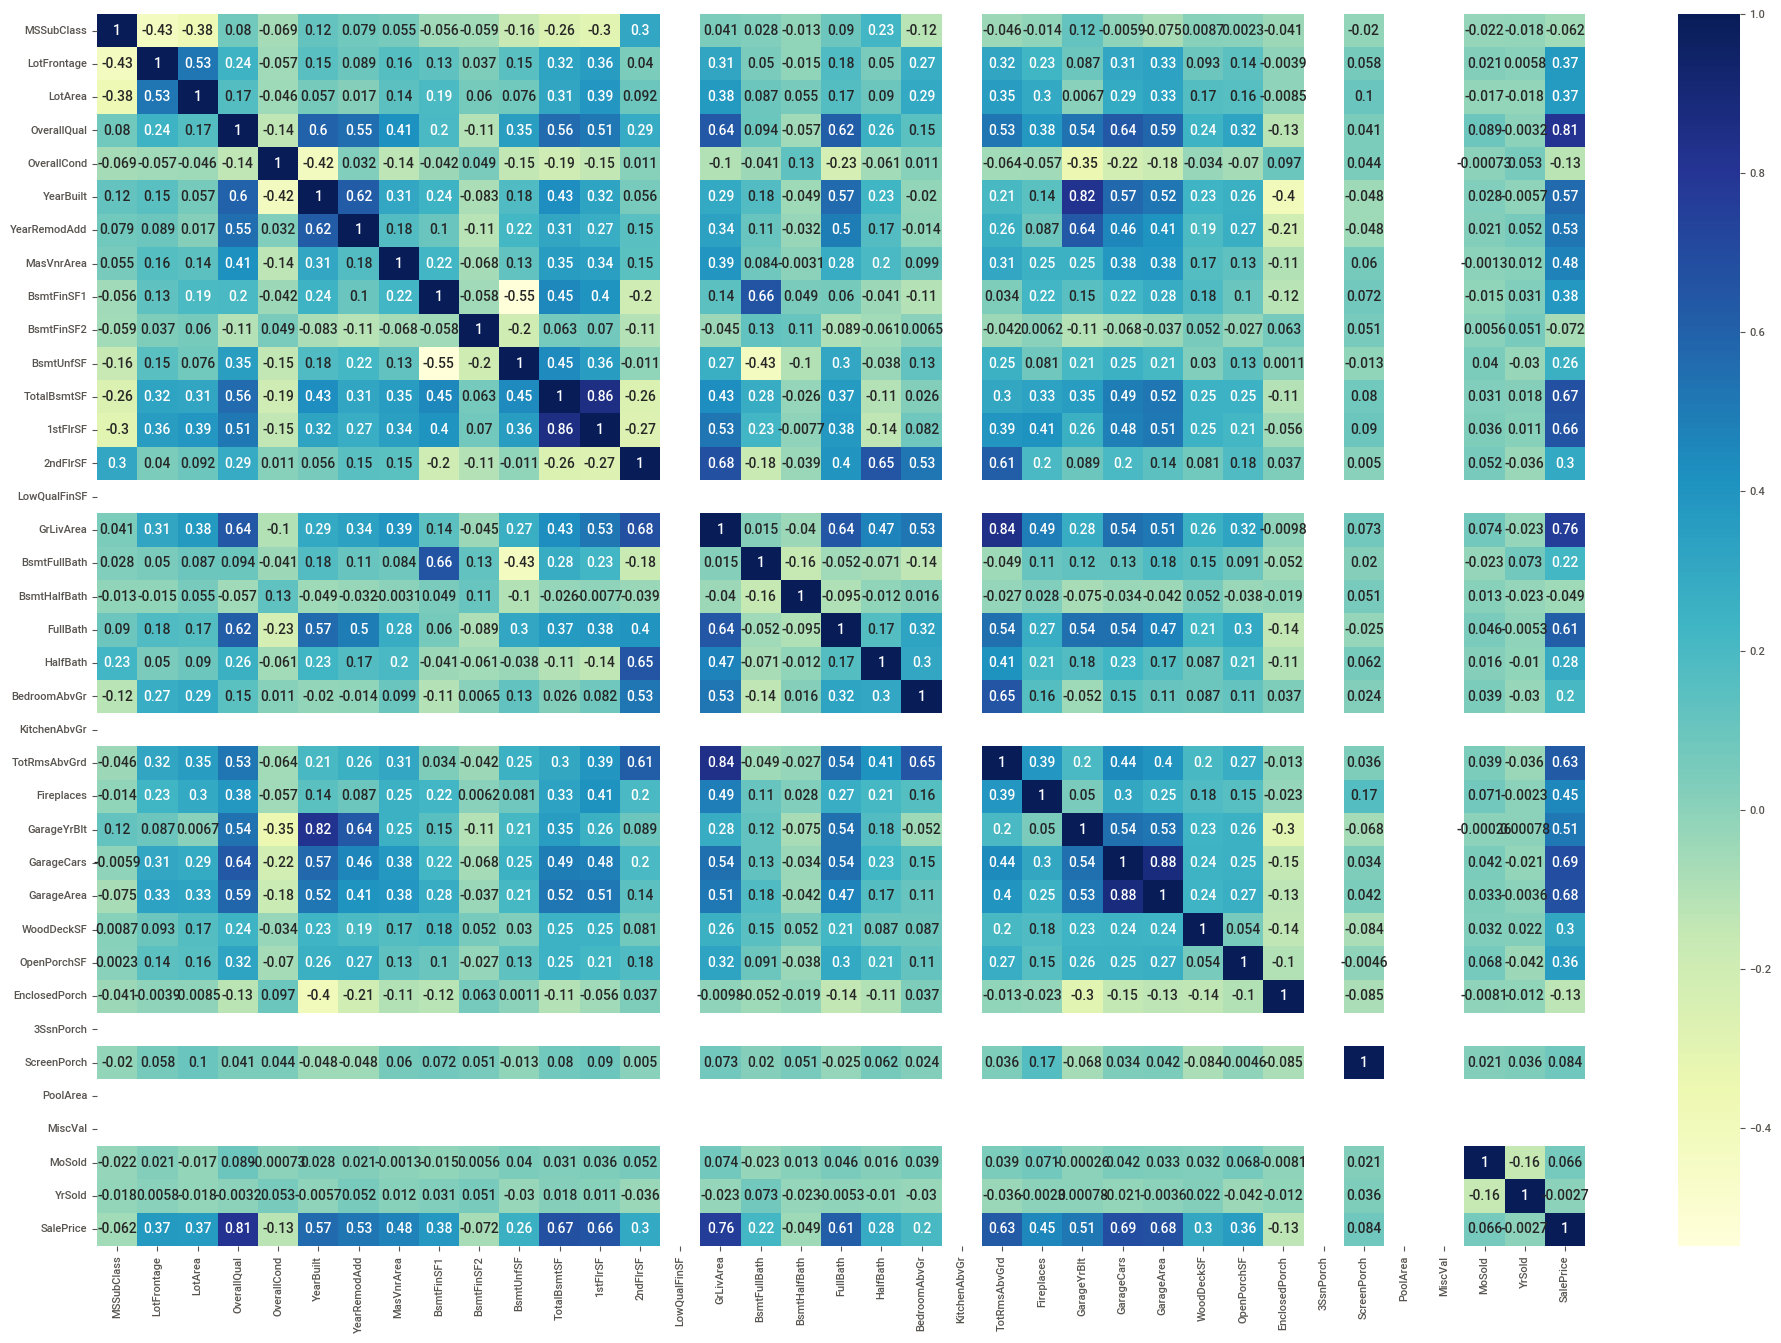

In [42]:
plt.figure(figsize=(24,16))

# heatmap
sns.heatmap(housePricing.corr(), cmap="YlGnBu", annot=True)
plt.show()

#### Inference : 
Variables with high Correlation value with SalesPrice :
- OverallQual is 0.81
- YearBuilt is 0.57
- YearRemodelAdd is 0.53
- TotalBsmtSF is 0.67
- 1stFlrSF is 0.66
- GrLivArea is 0.77
- FullBath is 0.62
- TotRmsAbvGrd is 0.63
- GarageYrBlt is 0.51
- GarageCars is 0.69
- GarageArea is 0.68

These are the variables that and correlated with each other as well:
For example
- LotFronatge and LotArea 0.52
- OverallQual with YearBuilt,YearRemodelAdd,GrLivArea, FullBath,GarageCars, GarageArea between 0.54 to 0.64
Etc...

Hence we need to keep an eye out for multicoleniearity while building a model.



### Univariate Analysis

In [43]:
housePricing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Alley and Street v/s SalePrice

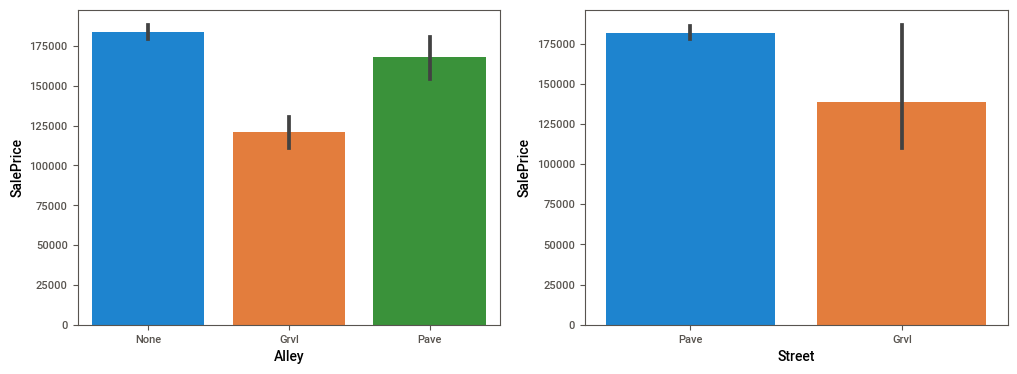

In [44]:
plt.figure(figsize=(12, 9))

housePricing
plt.subplot(2,2,1)
sns.barplot(x = 'Alley', y = 'SalePrice', data = housePricing)
plt.subplot(2,2,2)
sns.barplot(x = 'Street', y = 'SalePrice', data = housePricing)
plt.show()

#### Inference: Alley with Gravel has lower sales price compared to No alley. And Street with Pavement has more preference. So we can say that Gravel both in Alley or Street is not preferred

### LotShape and LandContour v/s SalePrice

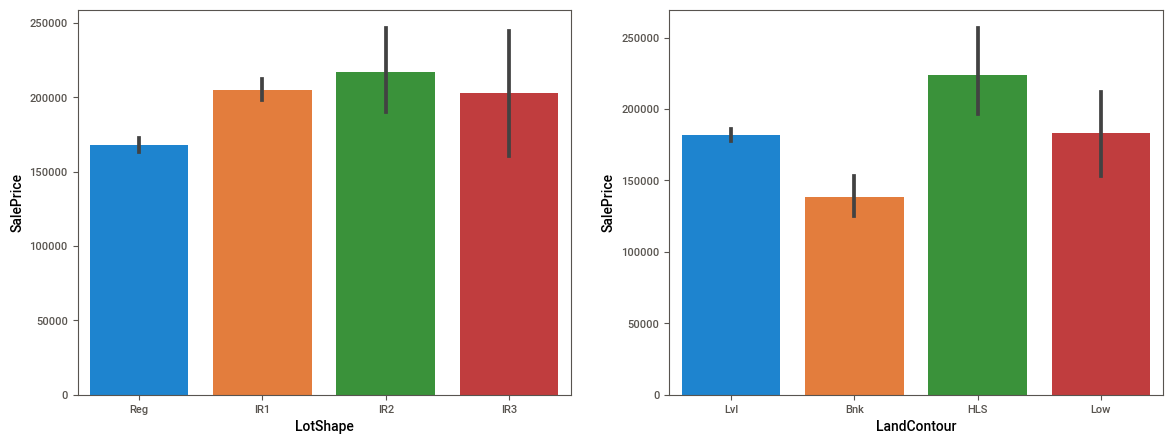

In [45]:
plt.figure(figsize=(14, 11))


plt.subplot(2,2,1)
sns.barplot(x = 'LotShape', y = 'SalePrice', data = housePricing)
plt.subplot(2,2,2)
sns.barplot(x = 'LandContour', y = 'SalePrice', data = housePricing)
plt.show()

#### Inference: Modereately Irregular land has high Salesprice. And Hill side is preferred compared to rest of land contours

### LotConfig and LandSlope v/s SalePrice

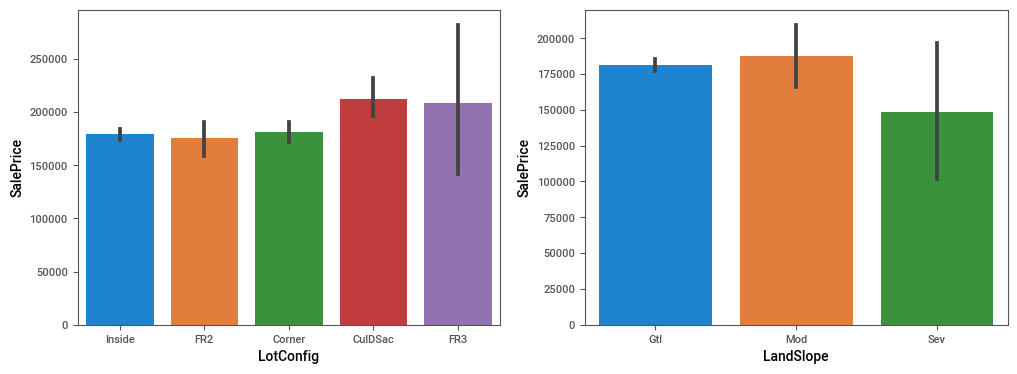

In [46]:
plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
sns.barplot(x = 'LotConfig', y = 'SalePrice', data = housePricing)
plt.subplot(2,2,2)
sns.barplot(x = 'LandSlope', y = 'SalePrice', data = housePricing)
plt.show()

#### Inference: Not much variance can be seem in terms of land configurations and land slopes.

### OverallQual and OverallCond v/s SalePrice

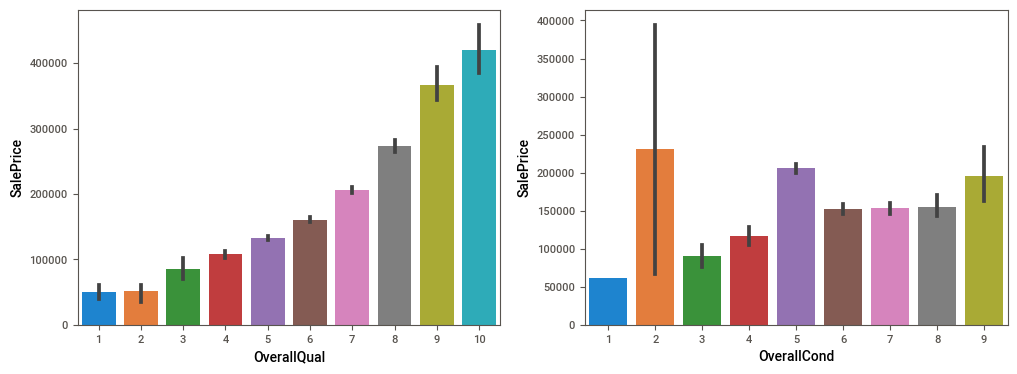

In [47]:
plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
sns.barplot(x = 'OverallQual', y = 'SalePrice', data = housePricing)
plt.subplot(2,2,2)
sns.barplot(x = 'OverallCond', y = 'SalePrice', data = housePricing)
plt.show()

#### Inference: Excellent overall quality is bring higher SalesPrice which is obvious but we don't see similar prefernce for Overall Condition as Poor condition house has more SalesPrice.

### ExterQual and Foundation v/s SalePrice

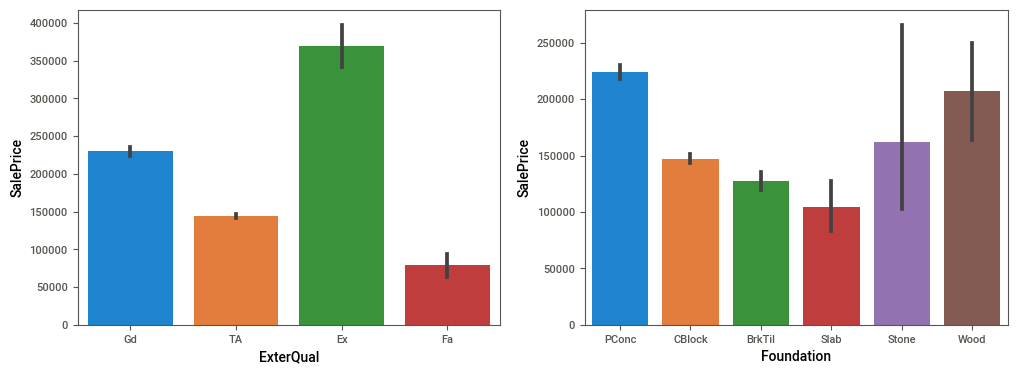

In [48]:
plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
sns.barplot(x = 'ExterQual', y = 'SalePrice', data = housePricing)
plt.subplot(2,2,2)
sns.barplot(x = 'Foundation', y = 'SalePrice', data = housePricing)
plt.show()

#### Inference: Excellent external Quality has high SalesPrice. Wood and concrete which define solid foundations drive higher SalesPrice compared to others

### HeatingQC and CentralAir v/s SalePrice

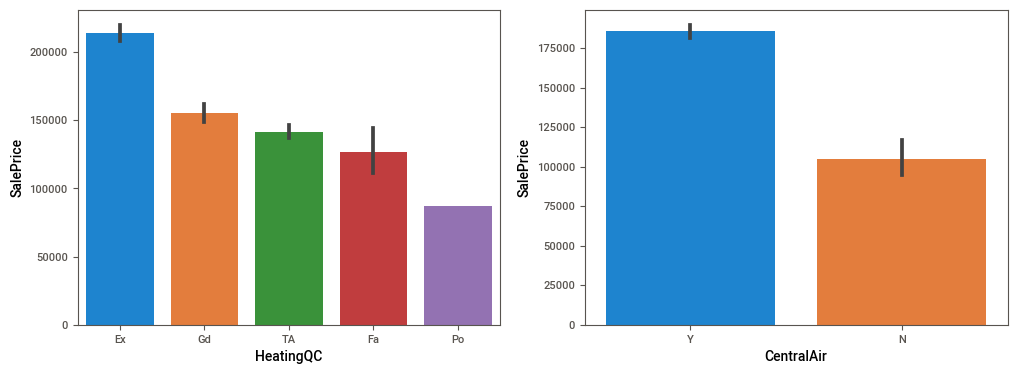

In [49]:
plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
sns.barplot(x = 'HeatingQC', y = 'SalePrice', data = housePricing)
plt.subplot(2,2,2)
sns.barplot(x = 'CentralAir', y = 'SalePrice', data = housePricing)
plt.show()

#### Inference: Excellent Heating and Central Air Conditioning have higher SalesPrice

### KitchenQual and FullBath v/s SalePrice

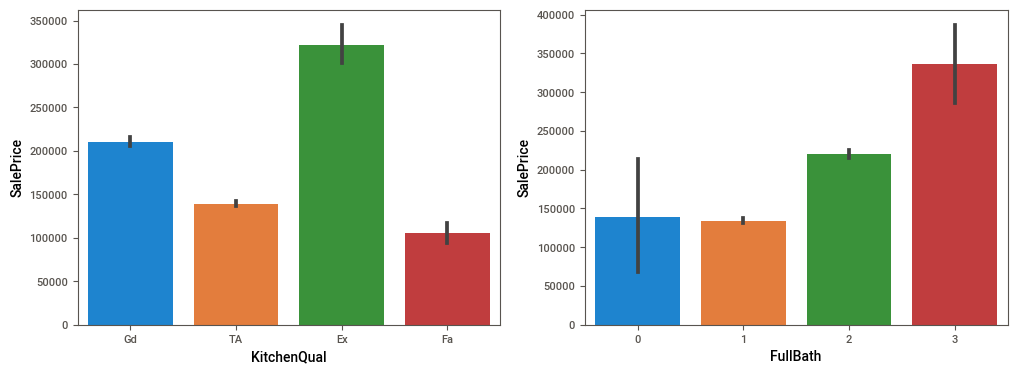

In [50]:
plt.figure(figsize=(12, 9))
plt.subplot(2,2,1)
sns.barplot(x = 'KitchenQual', y = 'SalePrice', data = housePricing)
plt.subplot(2,2,2)
sns.barplot(x = 'FullBath', y = 'SalePrice', data = housePricing)
plt.show()

#### Inference: Excellent Kitchen quality and 3 full baths have highest SalesPrice

### Univariate Analysis Inference
- Alley with Gravel has lower sales price compared to No alley. And Street with Pavement has more preference. So we can say that Gravel both in Alley or Street is not preferred
- Modereately Irregular land has high Salesprice. And Hill side is preferred compared to rest of land contours
- Not much variance can be seem in terms of land configurations and land slopes.
- Very Excellent to Excellent overall quality is driving higher SalesPrice which is obvious but we don't see similar prefernce for Overall Condition as Poor condition house has more SalesPrice.
- Excellent external Quality has high SalesPrice. Wood and concrete which define solid foundations drive higher SalesPrice compared to others
- Excellent Heating and Central Air Conditioning have higher SalesPrice
- Excellent Kitchen quality and 3 full baths have highest SalesPrice

### Bivariate Analysis

### LotShape and LandContour with respect to SalePrice

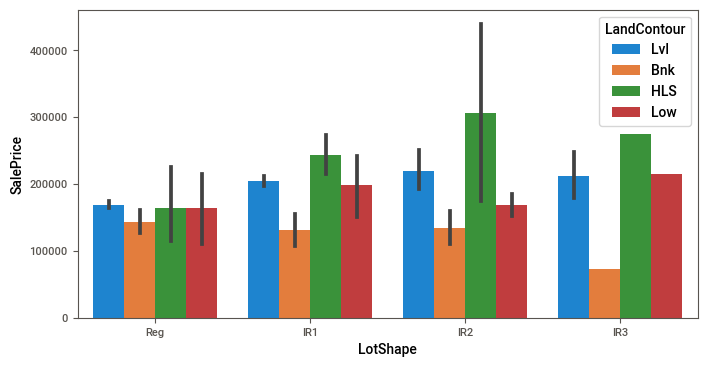

In [51]:
plt.figure(figsize = (8,4) , dpi = 100)

sns.barplot(data = housePricing, x = "LotShape" , y = "SalePrice", hue = "LandContour" )
plt.show()

#### Inference: Hills have higher sales price regardless of lot shape and Moderately Irregular land shape has more SalesPrice across all land contours

### OverallQual and BldgType with respect to SalePrice

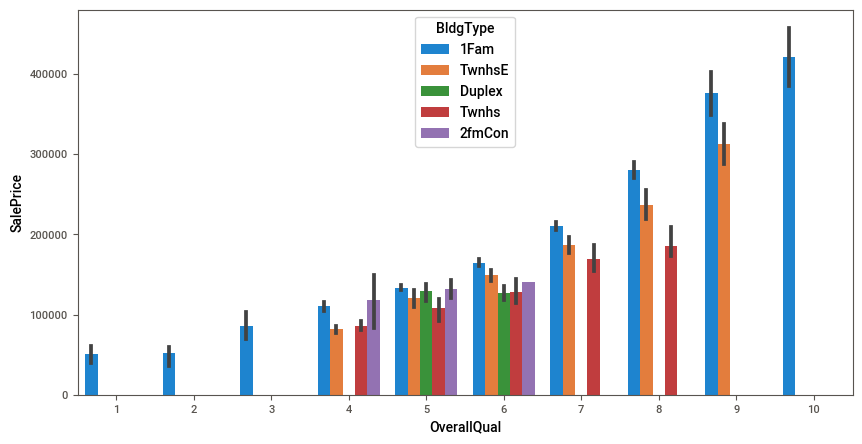

In [52]:
plt.figure(figsize = (10,5))

sns.barplot(data = housePricing, x = "OverallQual" , y = "SalePrice",  hue = "BldgType" )
plt.show()

#### Inference: Single-family Detached building type has higher SalesPrice across all overall qualities and property with excellent overall quality has hoghest SalesPrice for single famility Building type

### OverallQual and ExterQual with respect to SalePrice

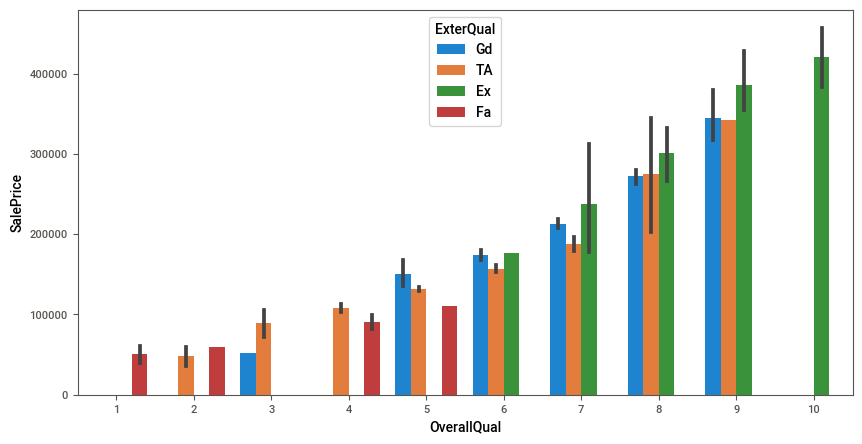

In [53]:
plt.figure(figsize = (10,5))

sns.barplot(data = housePricing, x = "OverallQual" , y = "SalePrice", hue = "ExterQual" )
plt.show()

#### Inference: Excellent external quality is driving more SalesPrice when Overall quality is Above Average. And SalesPrice is really low for Average external conditions and below

### OverallQual and BsmtCond with respect to SalePrice

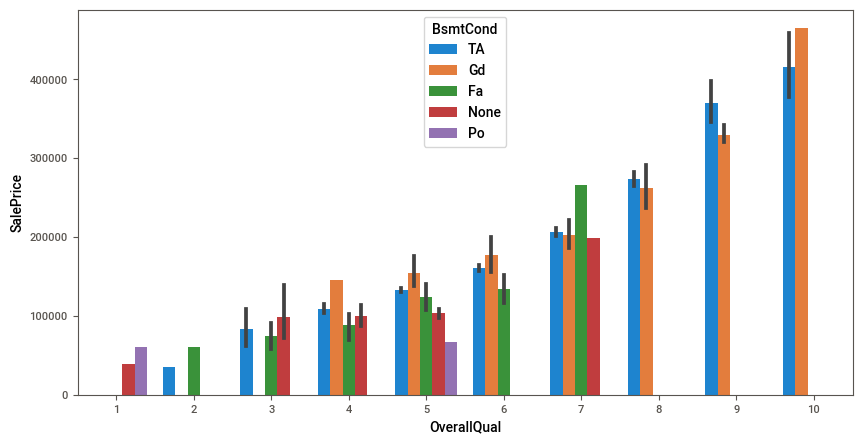

In [54]:
plt.figure(figsize = (10,5))

sns.barplot(data = housePricing, x = "OverallQual" , y = "SalePrice", hue = "BsmtCond" )
plt.show()

#### Inference:  Good to Average Basement condition is driving SalesPrice when Overall quality is good to very excellent. In case of average overeall quality we can see different base condition is accepted.

### OverallQual and GarageQual with respect to SalePrice

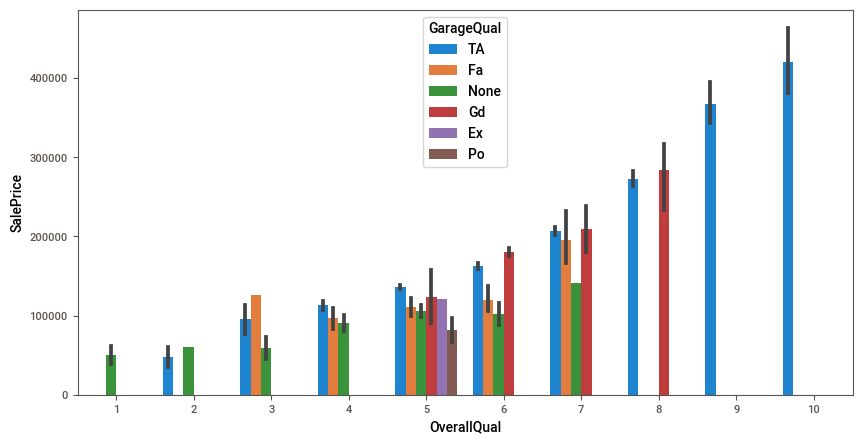

In [55]:
plt.figure(figsize = (10,5))

sns.barplot(data = housePricing, x = "OverallQual" , y = "SalePrice",  hue = "GarageQual" )
plt.show()

#### Inference: Average to Good Garage quality is driving SalesPrice indicating that excellent garage quality is not expected as much when overall quality is Good. 

### Bivariate Analysis Inference:
- Hills have higher sales price regardless of lot shape and Moderately Irregular land shape has more SalesPrice across all land contours
- Single-family Detached building type has higher SalesPrice across all overall qualities and property with excellent overall quality has hoghest SalesPrice for single famility Building type
- Excellent external quality is driving more SalesPrice when Overall quality is Above Average. And SalesPrice is really low for Average external conditions and below
- Average to Good Garage quality is driving SalesPrice indicating that excellent garage quality is not expected as much when overall quality is Good. 
- Good to Average Basement condition is driving SalesPrice when Overall quality is good to very excellent. In case of average overeall quality we can see different base condition is accepted.

## 3. Data Preparation 

#### Data transformation

<Axes: xlabel='SalePrice', ylabel='Density'>

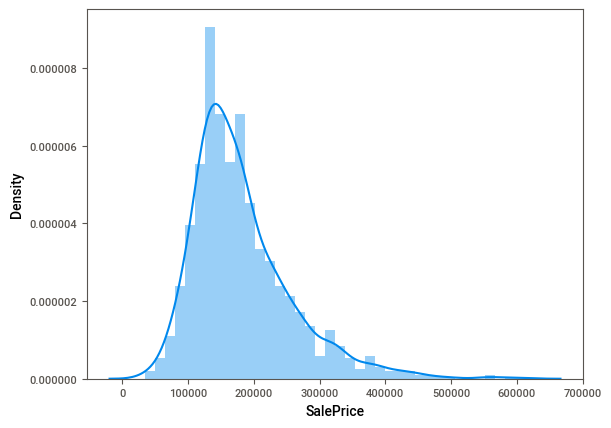

In [56]:
sns.distplot(housePricing["SalePrice"])

<Axes: xlabel='SalePrice', ylabel='Density'>

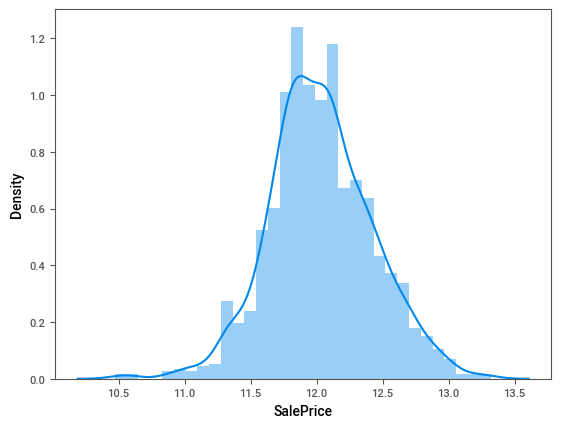

In [57]:
sns.distplot(np.log(housePricing["SalePrice"]))

In [58]:
housePricing["TransformedPrice"] = np.log(housePricing["SalePrice"])

In [59]:
housePricing.shape

(1266, 81)

In [60]:
housePricing.drop(['SalePrice'], axis = 1, inplace = True)

In [61]:
housePricing.shape

(1266, 80)

#### Dummy Variables
Some of the variables seem to have multiple levels so let's create dummy variables for them

In [62]:
categoricalColumns=housePricing.select_dtypes(include=['object'])
categoricalColumns.shape

(1266, 43)

In [63]:
categoricalColumns.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [64]:
dummies = pd.get_dummies(categoricalColumns, drop_first=True)

In [65]:
# Drop categorical variable columns
housePricing = housePricing.drop(list(categoricalColumns.columns), axis=1)

In [66]:
# Concatenate dummy variables with the original dataframe
housePricing = pd.concat([housePricing, dummies], axis=1)

In [67]:
housePricing.shape

(1266, 244)

In [68]:
housePricing.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0          2003       196.0         706           0  ...               0   
1          1976         0.0         978           0  ...               0   
2          2002       162.0         486           0  ...               0   
3          1970         0.0         216           0  ...               0   
4          2000       350.0         655           0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 244 columns]

#### Now that the Data is prepared let's start with spliting and model building

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for model building when we don't have test data is performing a train-test split.

### Split into X and y then into training and testing data sets

In [69]:
housePricing.shape

(1266, 244)

In [70]:
y = housePricing.pop('TransformedPrice')
y.head()

0    12.247694
1    12.109011
2    12.317167
3    11.849398
4    12.429216
Name: TransformedPrice, dtype: float64

In [71]:
X = housePricing
X.shape

(1266, 243)

In [72]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

In [73]:
print(X_train.shape)
print(X_test.shape)

(886, 243)
(380, 243)


In [74]:
print(y_train.shape)
print(y_test.shape)

(886,)
(380,)


In [75]:
X_train.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
686           60         84.0    10207            7            6       2007   
933           20         63.0     8487            7            5       2004   
1217          20         72.0     8640            8            5       2009   
485           20         80.0     9600            5            7       1950   
1303          20         73.0     8688            7            5       2005   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
686           2007         0.0           0           0  ...               0   
933           2004       210.0          20           0  ...               0   
1217          2009        72.0         936           0  ...               0   
485           2007         0.0         607           0  ...               0   
1303          2005       228.0           0           0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
686                0             1             0            0   
933                0             0             0            1   
1217               0             1             0            0   
485                0             0             0            1   
1303               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
686                       0                     0                     0   
933                       0                     0                     0   
1217                      0                     0                     0   
485                       0                     0                     0   
1303                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
686                      0                      1  
933                      1                      0  
1217                     0                      1  
485                      1                      0  
1303                     1                      0  

[5 rows x 243 columns]

### Rescaling the Features 


#### Apply scaler() to all the columns except the categorical and 'dummy' variables


In [76]:
X_train.select_dtypes(include=['int64','int32','float64','float32']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [77]:
num_vars = ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold']

In [78]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [79]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
846    0.235294     0.335404  0.227756     0.666667     0.428571   0.869231   
463    0.294118     0.329193  0.303636     0.555556     0.714286   0.415385   
126    0.588235     0.298137  0.103068     0.555556     0.428571   0.738462   
718    0.235294     0.465839  0.262557     0.666667     0.428571   0.869231   
123    0.588235     0.211180  0.187273     0.555556     0.428571   0.869231   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
846      0.716667    0.121346    0.234461         0.0  ...               0   
463      0.750000    0.000000    0.148995         0.0  ...               0   
126      0.433333    0.000000    0.054845         0.0  ...               0   
718      0.733333    0.576616    0.536106         0.0  ...               0   
123      0.716667    0.000000    0.137112         0.0  ...               0   

     SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
846               0             0             0            1   
463               0             0             0            1   
126               0             0             0            1   
718               0             0             0            1   
123               0             0             0            1   

     SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
846                      0                     0                     0   
463                      0                     0                     0   
126                      0                     0                     0   
718                      0                     0                     0   
123                      0                     0                     0   

     SaleCondition_Normal  SaleCondition_Partial  
846                     1                      0  
463                     1                      0  
126                     1                      0  
718                     1                      0  
123                     1                      0  

[5 rows x 243 columns]

In [80]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  \
686     0.235294     0.391304  0.253040     0.666667     0.571429   0.976923   
933     0.000000     0.260870  0.204176     0.666667     0.428571   0.953846   
1217    0.000000     0.316770  0.208523     0.777778     0.428571   0.992308   
485     0.000000     0.366460  0.235795     0.444444     0.714286   0.538462   
1303    0.000000     0.322981  0.209886     0.666667     0.428571   0.961538   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
686       0.950000    0.000000    0.000000         0.0  ...               0   
933       0.900000    0.186005    0.009141         0.0  ...               0   
1217      0.983333    0.063773    0.427788         0.0  ...               0   
485       0.950000    0.000000    0.277422         0.0  ...               0   
1303      0.916667    0.201949    0.000000         0.0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
686                0             1             0            0   
933                0             0             0            1   
1217               0             1             0            0   
485                0             0             0            1   
1303               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
686                       0                     0                     0   
933                       0                     0                     0   
1217                      0                     0                     0   
485                       0                     0                     0   
1303                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
686                      0                      1  
933                      1                      0  
1217                     0                      1  
485                      1                      0  
1303                     1                      0  

[5 rows x 243 columns]

In [81]:
y_train

686     12.336553
933     12.154779
1217    12.343467
485     11.898188
1303    12.354493
          ...    
937     12.441145
64      12.299108
408     12.542545
96      12.273731
926     12.560244
Name: TransformedPrice, Length: 886, dtype: float64

## Step 5: Model Building


### Linear Regression


In [82]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [83]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

-46517644533.319305
[-2.83940204e-01  9.84829175e-02  2.36636758e-01  3.56087823e-01
  2.71138885e-01  3.56168208e-01  5.92190597e-02 -2.92168887e-04
  8.60227567e+10  3.82148627e+10  9.18414807e+10 -1.26046142e+11
  4.49842704e+10  2.50413475e+10  1.23832717e+11 -4.83884014e+10
  2.24432742e-02  3.73857544e-03  4.96685928e-02  3.02462201e-02
  7.93030865e-02  4.50362334e+11 -2.21843865e-02  6.28955429e-03
 -5.30828033e-02  6.37015847e-02  1.77086009e-01  3.21716977e-02
  5.96995959e-02  5.81009900e-02 -1.82878560e+11  1.23099835e-01
  7.06237153e+10  1.27258054e+11  2.36845016e-02 -8.64219666e-03
  2.75711060e-01  3.13526154e-01  2.84542084e-01  2.33856201e-01
 -8.88118744e-02 -4.58221436e-02 -1.68457031e-02  1.42803192e-02
 -2.81744003e-02  1.10321045e-02  2.64511108e-02  2.35137939e-02
  1.20582581e-02 -3.45703125e-01  2.36473083e-02 -5.40618896e-02
 -5.07736206e-03 -1.99966431e-02 -2.83432007e-03 -1.02457047e-01
 -2.64444351e-02 -5.24711609e-02  3.95355225e-02  1.33514404e-04
 -3.3

In [84]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9610669031326066
-3.647940843608079e+19
5.22310203585101
2.206665351630077e+21
0.00589514902466254
5.807014083237045e+18


#### Inference : With generic Liner Regression we can see that R2 for training is 0.92 where as test R2 is -3.64 which tells us large overfitting. Now let's look at Ridge and Lasso Regression

## Ridge and Lasso Regression

#### Ridge

In [85]:
#create a list of alphas and tune using GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

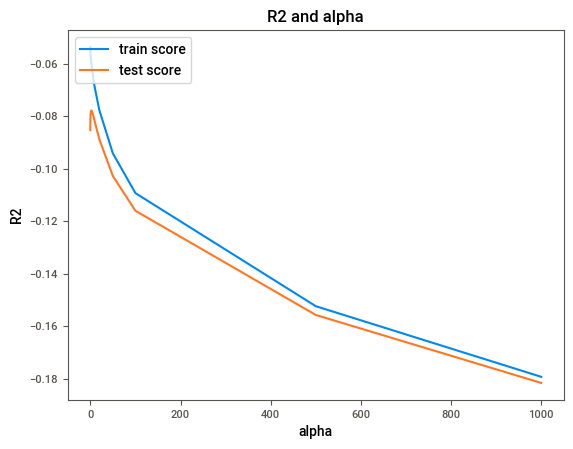

In [86]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Tuning inference:  We can see tha alpha is between 0 to 50

In [87]:
#create a list of alphas and tune using GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20,
                                   50]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

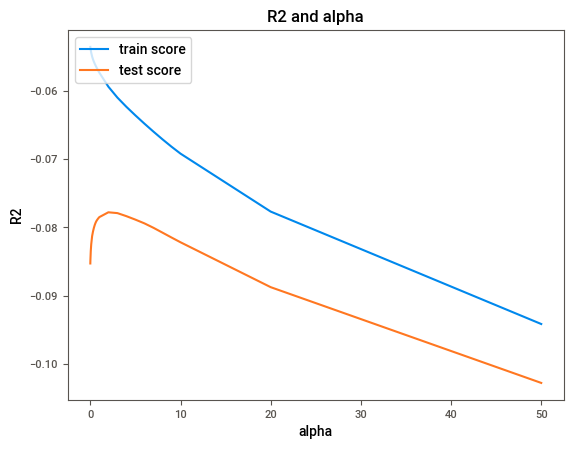

In [88]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Tuning inference:  We can see tha alpha is between 0 to 5

In [89]:
#create a list of alphas and tune using GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

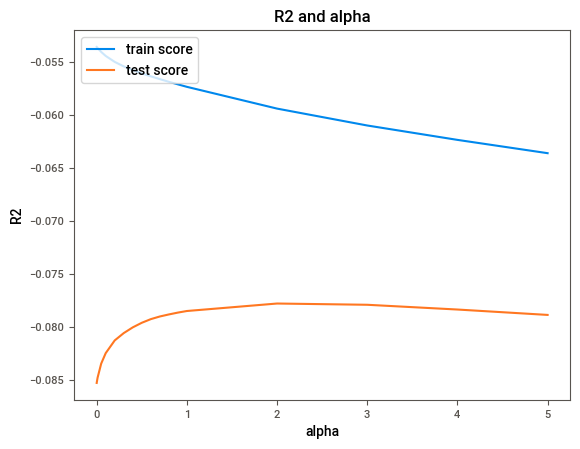

In [90]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Tuning inference:  We can see tha alpha is between 0 to 2

In [91]:
#create a list of alphas and tune using GridSearchCV

params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

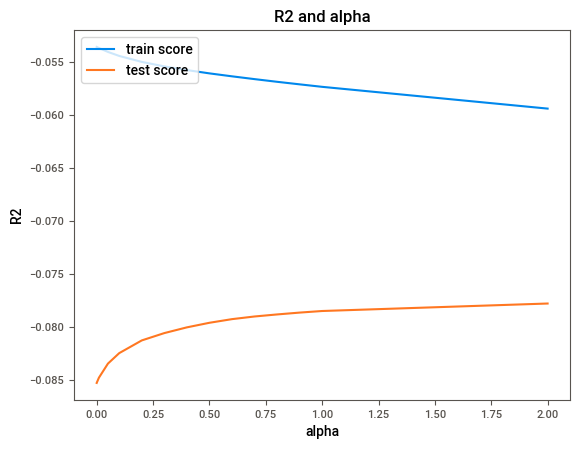

In [92]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [93]:
print(model_cv.best_params_)

{'alpha': 2.0}


In [94]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
alpha = 2.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-4.35383126e-02  8.30366573e-02  1.50246191e-01  2.91612015e-01
  2.02110331e-01  1.74558516e-01  8.68859360e-02  1.41085546e-02
  1.92767970e-01  2.42103307e-02  8.93685758e-02  2.04015518e-01
  2.66810794e-01  1.31533881e-01  0.00000000e+00  3.16110350e-01
  3.27806224e-02  1.12504533e-02  8.74539380e-02  4.82859796e-02
  8.46312086e-02  0.00000000e+00  9.06465205e-02  2.54926945e-02
 -3.78081059e-02  9.13810336e-02  1.44626498e-01  3.85203813e-02
  6.57797646e-02  5.19542069e-02  0.00000000e+00  9.77345859e-02
  0.00000000e+00  0.00000000e+00  3.34593026e-02 -6.00346213e-03
  3.83317216e-02  5.15397700e-02  5.83986000e-02  5.11817586e-03
 -2.32363374e-02 -2.91319005e-02  9.60458531e-03  1.83463803e-02
 -1.02298356e-02  6.11576933e-03  1.42123782e-02 -1.07727511e-02
  1.34335925e-03 -6.32844240e-02  1.80616848e-02 -5.21646435e-02
  1.09875916e-03 -2.49994290e-02 -1.53498660e-04 -4.04309815e-02
 -3.23296073e-03 -3.35926438e-02  1.30805590e-02  2.00963368e-02
 -1.84903802e-02  1.12124

In [95]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9546003275421989
0.9019920216922588
6.090630869898881
5.928572287403026
0.006874301207560813
0.015601506019481647


In [96]:
#Fitting Ridge model for alpha = 1.0 and printing coefficients which have been penalised
alpha = 1.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.06374462  0.08856094  0.1753117   0.31979344  0.22633932  0.22772678
  0.07905326  0.0061123   0.20473035  0.02957712  0.08870697  0.21332453
  0.29276132  0.14906714  0.          0.34930884  0.02895805  0.0103254
  0.07746182  0.04542012  0.08538906  0.          0.05777765  0.01549329
 -0.04455973  0.08199831  0.1537895   0.03757763  0.06492866  0.05529735
  0.          0.10566721  0.          0.          0.03133977 -0.00608058
  0.05924331  0.08165771  0.07990598  0.03147636 -0.03150647 -0.03044544
  0.00683378  0.01731253 -0.01514245  0.00711886  0.01408328 -0.01139418
  0.00156615 -0.10499687  0.01813703 -0.054604    0.00153398 -0.02346962
 -0.00220234 -0.05561839 -0.00689445 -0.04094198  0.01939353  0.0183251
 -0.0204921   0.11688103 -0.06070318 -0.03553615 -0.01267169 -0.12795294
 -0.05116202 -0.02467997  0.04921552 -0.03096501  0.03205564  0.049648
 -0.02683729  0.02495549 -0.00426249 -0.01049551  0.05273806  0.11159751
  0.00162747  0.02303934  0.04339015  0.07595854 -0.004

In [97]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train_ridge)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_ridge)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_ridge))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_ridge))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_ridge)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_ridge)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9572413606391516
0.9008950212992076
5.736320875180838
5.994930621100024
0.006474402793657831
0.015776133213421115


#### After doing Ridge regression using alpha 1.0 and 2.0

#### Inference :
- We can see huge imporvement in r2 values from what we saw in Linear Regression
- R2 values are not so different for alpha 2.0 and 1.0 but RSS values is slightly less for alpha=1.0 Hence going with alpha =1.0 for final Ridge model
- R2 value for train=0.957 and for tset R2=0.900 which are pretty decent

## Lasso

In [98]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

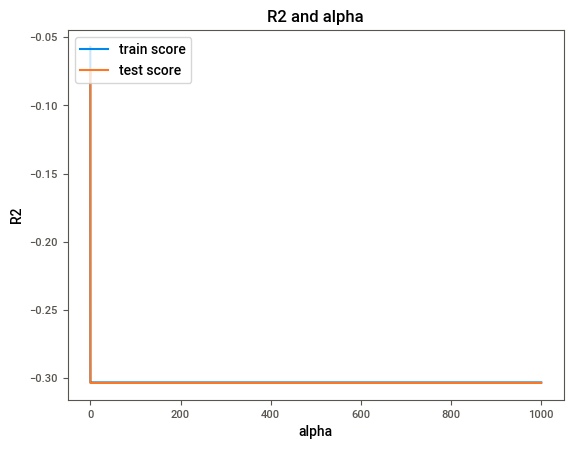

In [99]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Tuning inference:  We can see tha alpha is between 0 to 1

In [100]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

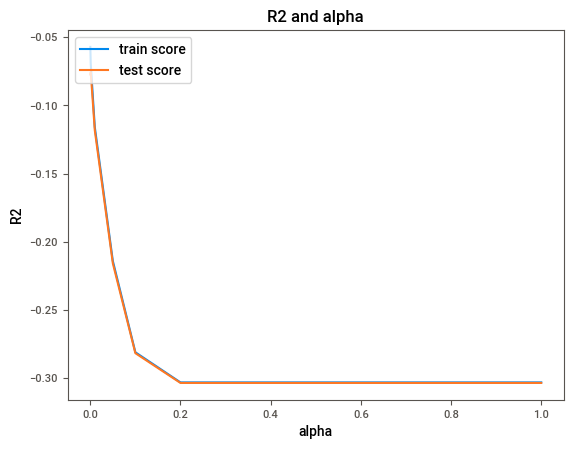

In [101]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Tuning inference:  We can see tha alpha is between 0 to 0.2

In [102]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

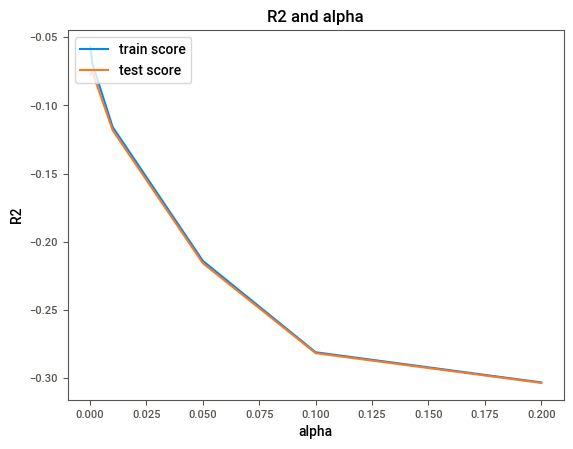

In [103]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### Tuning inference:  We can see tha alpha is between 0 to 0.025

In [104]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05 ]}

lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

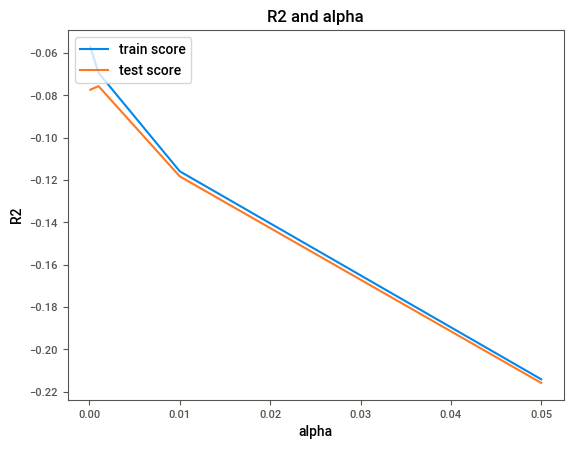

In [105]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2')

plt.title("R2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [106]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.001}


#### After tuning we got alpha=0.001 as best value hence going with this value for Lasso regression

In [107]:
#Fitting Ridge model for alpha = 0.001 and printing coefficients which have been penalised

alpha =0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001)

In [108]:
lasso.coef_

array([-0.00000000e+00,  4.91433032e-02,  1.13396894e-01,  4.70762108e-01,
        1.86446634e-01,  1.34782487e-01,  9.10243862e-02,  0.00000000e+00,
        1.34894333e-01,  0.00000000e+00,  0.00000000e+00,  2.91143828e-01,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  8.49892575e-01,
        3.04182853e-02,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  4.62288903e-02,  0.00000000e+00,
       -0.00000000e+00,  1.38539928e-01,  8.18361179e-02,  0.00000000e+00,
        3.90567965e-02,  0.00000000e+00,  0.00000000e+00,  5.46783702e-02,
        0.00000000e+00,  0.00000000e+00,  1.21245096e-02, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -8.23221910e-02,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -6.70195361e-05,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  4.57529566e-03, -0.00000000e+00,
        0.00000000e+00, -

In [109]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train_lasso = lasso.predict(X_train)
y_pred_test_lasso = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train_lasso)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test_lasso)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9362773403363869
0.9052133920802184
8.548766478877369
5.733709302375917
0.009648720630787097
0.01508870869046294


In [130]:
# For Subjective Questioning
#Fitting Ridge model for alpha = 0.002 and printing coefficients which have been penalised

# alpha =0.002

# lasso = Lasso(alpha=alpha)
        
# lasso.fit(X_train, y_train) 

Lasso(alpha=0.002)

In [131]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

#y_pred_train_lasso = lasso.predict(X_train)
#y_pred_test_lasso = lasso.predict(X_test)

#metric3 = []
#r2_train_lr = r2_score(y_train, y_pred_train_lasso)
#print(r2_train_lr)
#metric3.append(r2_train_lr)

#r2_test_lr = r2_score(y_test, y_pred_test_lasso)
#print(r2_test_lr)
#metric3.append(r2_test_lr)

#rss1_lr = np.sum(np.square(y_train - y_pred_train_lasso))
#print(rss1_lr)
#metric3.append(rss1_lr)

#rss2_lr = np.sum(np.square(y_test - y_pred_test_lasso))
#print(rss2_lr)
#metric3.append(rss2_lr)

#mse_train_lr = mean_squared_error(y_train, y_pred_train_lasso)
#print(mse_train_lr)
#metric3.append(mse_train_lr**0.5)

#mse_test_lr = mean_squared_error(y_test, y_pred_test_lasso)
#print(mse_test_lr)
#metric3.append(mse_test_lr**0.5)

0.9226888559450409
0.8926125956395121
10.371740919629087
6.49594043771276
0.011706253859626509
0.017094580099244108


### Inference : With Lasso Regression we see training R2= 0.936 and test R2= 0.905 which are pretty decent

In [110]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.610669e-01          0.957241          0.936277
1   R2 Score (Test)      -3.647941e+19          0.900895          0.905213
2       RSS (Train)       5.223102e+00          5.736321          8.548766
3        RSS (Test)       2.206665e+21          5.994931          5.733709
4       MSE (Train)       7.677987e-02          0.080464          0.098228
5        MSE (Test)       2.409775e+09          0.125603          0.122836

## Step 6: Residual Analysis of the train data


### Ridge

Text(0.5, 0, 'Errors')

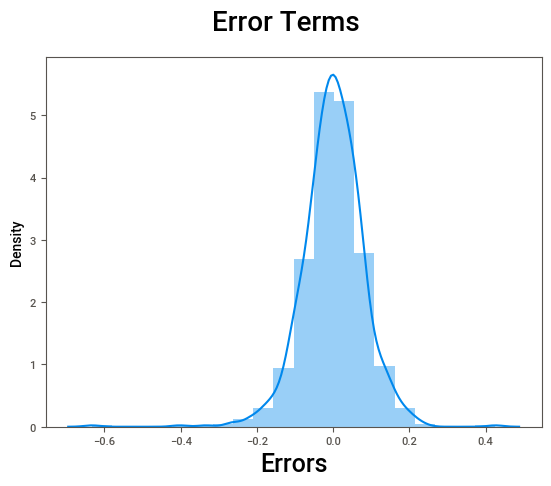

In [111]:
# Plot the  of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train_ridge), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation : Error terms are normally distributed

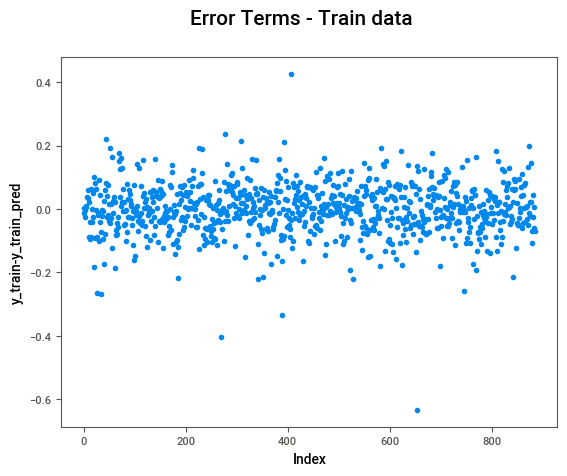

In [112]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.scatter(c,y_train-y_pred_train_ridge)
plt.suptitle('Error Terms - Train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observation : The variance of the error terms seems to be constant

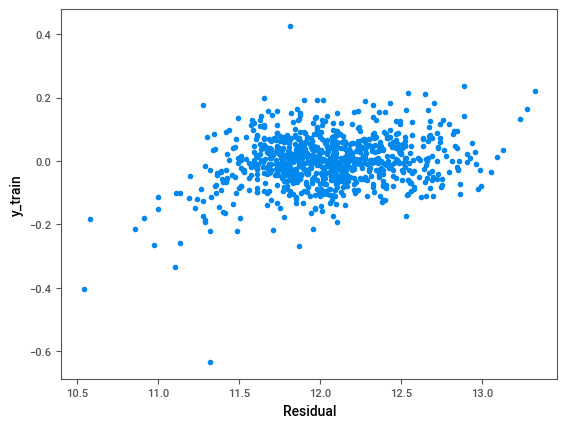

In [113]:
# Scatter plot to the check Linearity
residual = (y_train - y_pred_train_ridge)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

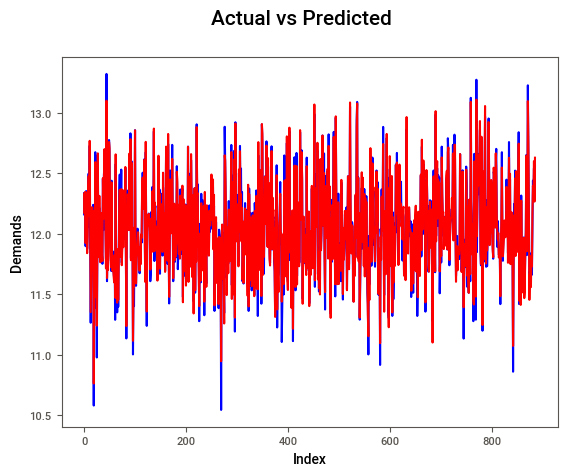

In [114]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_pred_train_ridge, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observation : Actual and Predicted result seem to follow same pattern so this model seems good

### Lasso 

Text(0.5, 0, 'Errors')

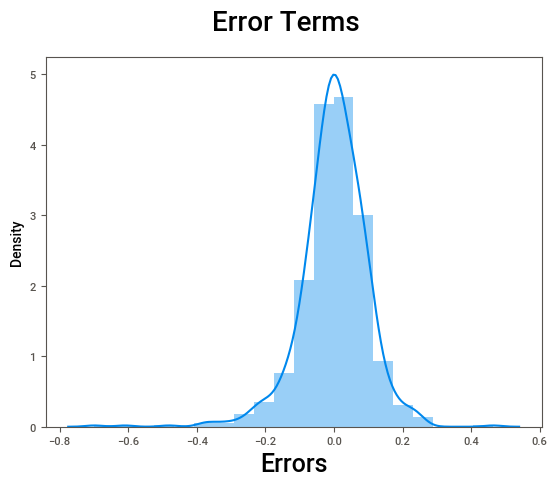

In [115]:
# Plot the t of the error terms
fig = plt.figure()
sns.distplot((y_train - y_pred_train_lasso), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### Observation : Error terms are normally distributed

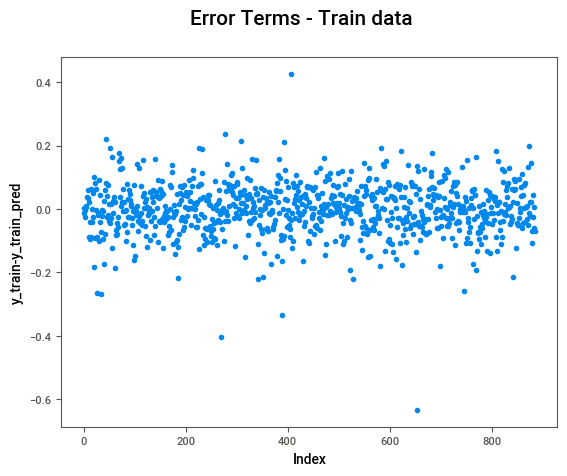

In [116]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.scatter(c,y_train-y_pred_train_ridge)
plt.suptitle('Error Terms - Train data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observation : The variance of the error terms seems to be constant

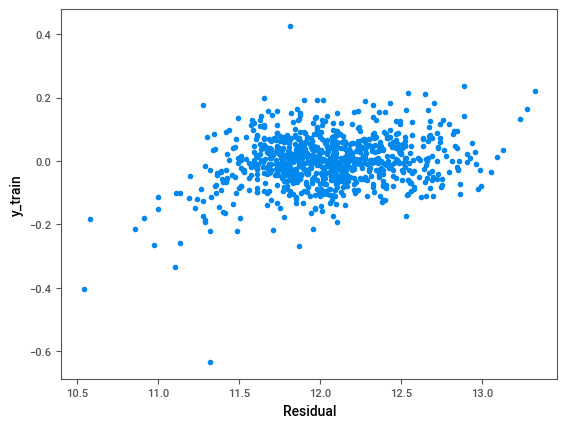

In [117]:
# Scatter plot to the check Linearity
residual = (y_train - y_pred_train_ridge)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

#### Observation: We can see linearity in residuals

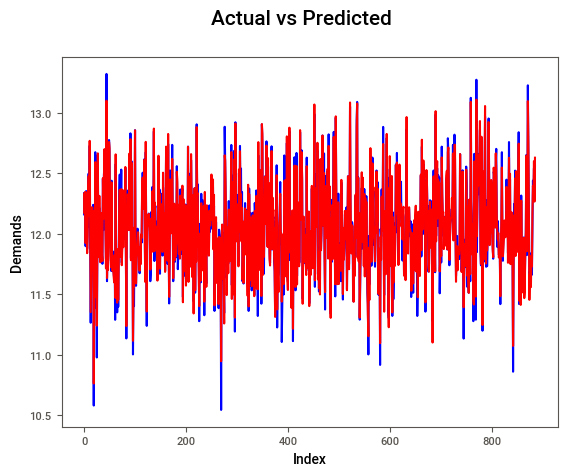

In [118]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_pred_train_ridge, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observation : Actual and Predicted result seem to follow same pattern so this model seems good

#### Inference : Residual Analysis of Ridge and Lasso models seem to be good

## Step 7: Model Evaluation
Let's now plot the graph for actual versus predicted values.

### Ridge: Plotting y_test and y_pred to understand the spread


Text(0, 0.5, 'y_pred')

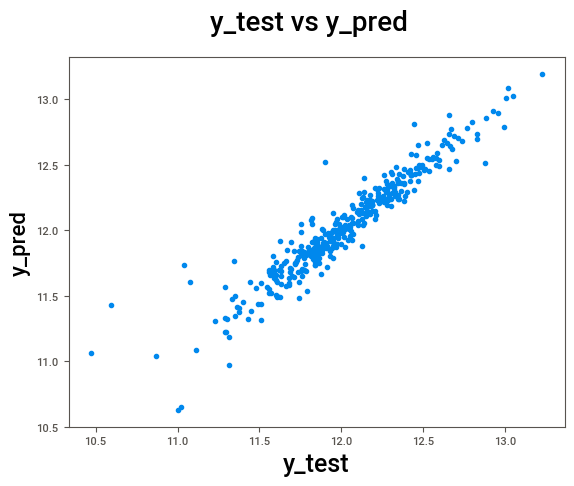

In [119]:
# Scatter plot
fig = plt.figure()
plt.scatter(y_test, y_pred_test_ridge)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Lasso: Plotting y_test and y_pred to understand the spread


Text(0, 0.5, 'y_pred')

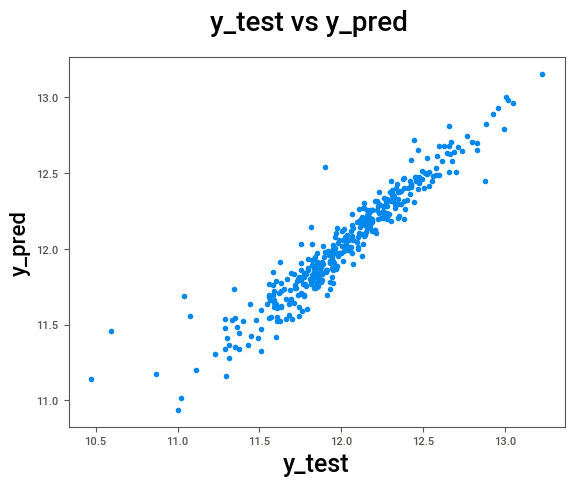

In [120]:
# Scatter plot
fig = plt.figure()
plt.scatter(y_test, y_pred_test_lasso)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

### Ridge : Comparison of actual and predicted values

Text(0, 0.5, 'Views')

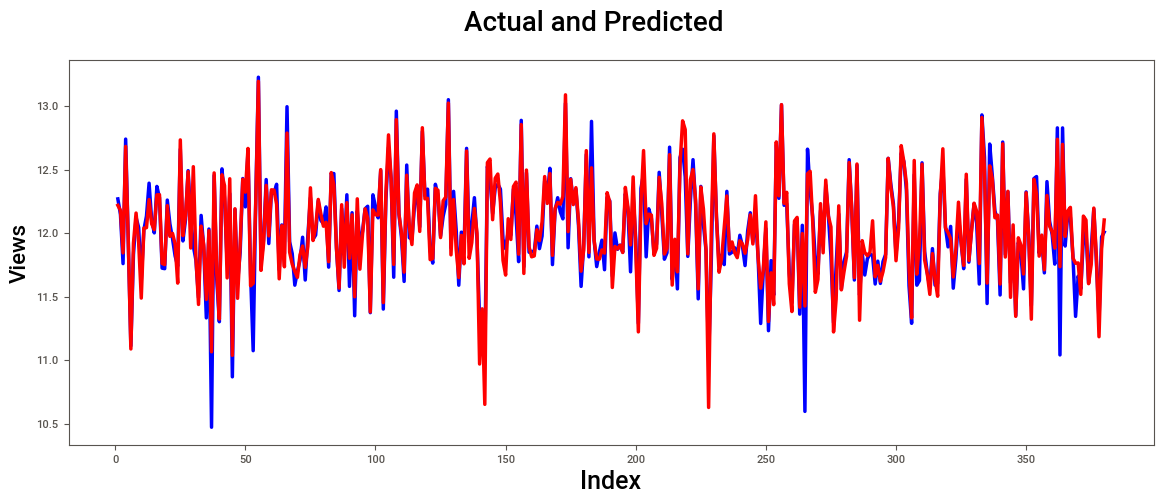

In [121]:
 
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_test_ridge, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

### Lasso : Comparison of actual and predicted values

Text(0, 0.5, 'Views')

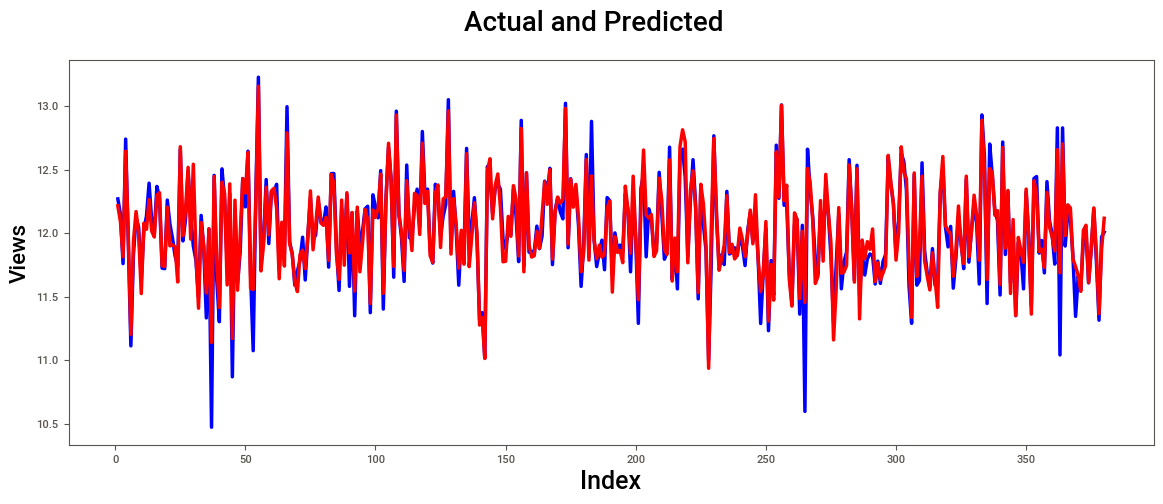

In [122]:
 
c = [i for i in range(1,len(y_test)+1,1)]
fig = plt.figure(figsize=(14,5))
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred_test_lasso, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

### Redge : Error Terms of test data set

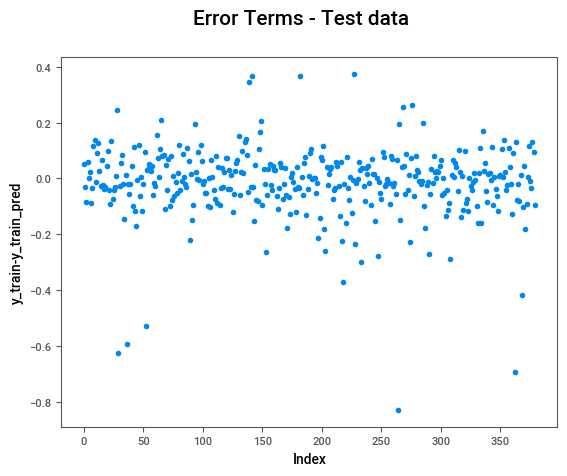

In [123]:
# Error Terms
c = [i for i in range(0,len(X_test),1)]
plt.scatter(c,y_test-y_pred_test_ridge)
plt.suptitle('Error Terms - Test data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

### Redge : Error Terms of test data set

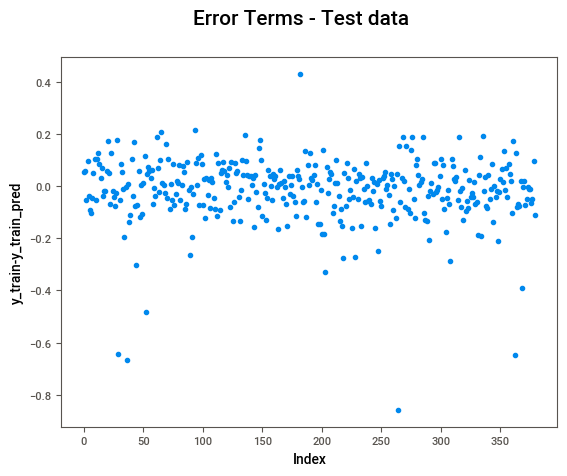

In [124]:
# Error Terms
c = [i for i in range(0,len(X_test),1)]
plt.scatter(c,y_test-y_pred_test_lasso)
plt.suptitle('Error Terms - Test data', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

## Lets observe the changes in the coefficients after regularization

In [125]:
betas = pd.DataFrame(index=X.columns)

In [126]:
betas.rows = X.columns

In [133]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [134]:
pd.set_option('display.max_rows', None)
betas.head(68)

Linear     Ridge     Lasso
MSSubClass           -2.839402e-01 -0.063745 -0.000000
LotFrontage           9.848292e-02  0.088561  0.021356
LotArea               2.366368e-01  0.175312  0.058354
OverallQual           3.560878e-01  0.319793  0.479544
OverallCond           2.711389e-01  0.226339  0.104082
YearBuilt             3.561682e-01  0.227727  0.051549
YearRemodAdd          5.921906e-02  0.079053  0.107143
MasVnrArea           -2.921689e-04  0.006112  0.000000
BsmtFinSF1            8.602276e+10  0.204730  0.138605
BsmtFinSF2            3.821486e+10  0.029577  0.000000
BsmtUnfSF             9.184148e+10  0.088707  0.000000
TotalBsmtSF          -1.260461e+11  0.213325  0.269926
1stFlrSF              4.498427e+10  0.292761  0.000000
2ndFlrSF              2.504135e+10  0.149067  0.000000
LowQualFinSF          1.238327e+11  0.000000  0.000000
GrLivArea            -4.838840e+10  0.349309  0.840037
BsmtFullBath          2.244327e-02  0.028958  0.020034
BsmtHalfBath          3.738575e-03  0.010325  0.000000
FullBath              4.966859e-02  0.077462  0.000000
HalfBath              3.024622e-02  0.045420  0.000000
BedroomAbvGr          7.930309e-02  0.085389  0.000000
KitchenAbvGr          4.503623e+11  0.000000  0.000000
TotRmsAbvGrd         -2.218439e-02  0.057778  0.008162
Fireplaces            6.289554e-03  0.015493  0.000000
GarageYrBlt          -5.308280e-02 -0.044560  0.000000
GarageCars            6.370158e-02  0.081998  0.146454
GarageArea            1.770860e-01  0.153790  0.090439
WoodDeckSF            3.217170e-02  0.037578  0.000000
OpenPorchSF           5.969960e-02  0.064929  0.026114
EnclosedPorch         5.810099e-02  0.055297  0.000000
3SsnPorch            -1.828786e+11  0.000000  0.000000
ScreenPorch           1.230998e-01  0.105667  0.005015
PoolArea              7.062372e+10  0.000000  0.000000
MiscVal               1.272581e+11  0.000000  0.000000
MoSold                2.368450e-02  0.031340  0.000000
YrSold               -8.642197e-03 -0.006081 -0.000000
MSZoning_FV           2.757111e-01  0.059243  0.000000
MSZoning_RH           3.135262e-01  0.081658 -0.000000
MSZoning_RL           2.845421e-01  0.079906  0.000000
MSZoning_RM           2.338562e-01  0.031476 -0.102522
Street_Pave          -8.881187e-02 -0.031506 -0.000000
Alley_None           -4.582214e-02 -0.030445 -0.000000
Alley_Pave           -1.684570e-02  0.006834  0.000000
LotShape_IR2          1.428032e-02  0.017313  0.000000
LotShape_IR3         -2.817440e-02 -0.015142 -0.000000
LotShape_Reg          1.103210e-02  0.007119 -0.004445
LandContour_HLS       2.645111e-02  0.014083  0.000000
LandContour_Low       2.351379e-02 -0.011394 -0.000000
LandContour_Lvl       1.205826e-02  0.001566 -0.000000
Utilities_NoSeWa     -3.457031e-01 -0.104997 -0.000000
LotConfig_CulDSac     2.364731e-02  0.018137  0.000000
LotConfig_FR2        -5.406189e-02 -0.054604 -0.000000
LotConfig_FR3        -5.077362e-03  0.001534  0.000000
LotConfig_Inside     -1.999664e-02 -0.023470 -0.010048
LandSlope_Mod        -2.834320e-03 -0.002202  0.000000
LandSlope_Sev        -1.024570e-01 -0.055618 -0.000000
Neighborhood_Blueste -2.644444e-02 -0.006894  0.000000
Neighborhood_BrDale  -5.247116e-02 -0.040942 -0.000000
Neighborhood_BrkSide  3.953552e-02  0.019394  0.000000
Neighborhood_ClearCr  1.335144e-04  0.018325  0.000000
Neighborhood_CollgCr -3.325081e-02 -0.020492 -0.000000
Neighborhood_Crawfor  1.253928e-01  0.116881  0.045981
Neighborhood_Edwards -6.028461e-02 -0.060703 -0.012454
Neighborhood_Gilbert -3.166199e-02 -0.035536 -0.000000
Neighborhood_IDOTRR   3.061676e-02 -0.012672 -0.000000
Neighborhood_MeadowV -1.458778e-01 -0.127953 -0.000000
Neighborhood_Mitchel -6.237411e-02 -0.051162 -0.000000
Neighborhood_NAmes   -4.425049e-02 -0.024680 -0.000000

In [135]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)       9.610669e-01          0.957241          0.922689
1   R2 Score (Test)      -3.647941e+19          0.900895          0.892613
2       RSS (Train)       5.223102e+00          5.736321         10.371741
3        RSS (Test)       2.206665e+21          5.994931          6.495940
4       MSE (Train)       7.677987e-02          0.080464          0.108195
5        MSE (Test)       2.409775e+09          0.125603          0.130746

## Conclusion

#### Ridge R2 Score (Test) ---> 0.900895
#### Lasso  R2 Score (Test) ----> 0.905213

#### R2 score of Lasso Regression for test data is slightly higher(to a hundredth decimal) than Ridge regression so let's analyze Lasso coefficients for our model



#### Looking at coefficients we got for Lasso Regression the variables that are significant in predicting the price of a house are as follows:

- LotArea: Lot size in square feet 
- OverallQual: Rates the overall material and finish of the house
- OverallCond: Rates the overall condition of the house
- YearBuilt: Original construction da
- BsmtFinSF1: Type 1 finished square feette
- TotalBsmtSF: Total square feet of basement area
- GrLivArea: Above grade (ground) living area square feet
- GarageCars: Size of garage in car capacity